In [1]:
%matplotlib inline
import numpy as np # Library for multi-dimensional arrays and math operations on them 
import pandas as pd # Library for data manipulation and analysis
import os # Interfacing python with the operating system
import matplotlib.pyplot as plt #Plotting library
import seaborn as sns #Plotting library with some statistical tools 
import nltk # Natural Language Processing toolkit, similar as textblob below, both have useful functions
from textblob import TextBlob
import string
import time
import re # Basically a string processing and manipulation library
from datetime import datetime ## Manipulating datetime inputs
from matplotlib.ticker import FuncFormatter
import sys
### My plotting style is inputted here #####
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
plt.rcParams["font.family"] = "Ubuntu"
plt.style.use('C:/Users/Toumba/Documents/plotstyle.mplstyle')
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['xtick.major.size'] = 8 
plt.rcParams['ytick.major.size'] = 8 
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
#plt.rcParams['xtick.minor.visible']=True
#plt.rcParams['ytick.minor.visible']=True
#plt.rcParams['xtick.minor.size'] = 5 
#plt.rcParams['ytick.minor.size'] = 5
#plt.rcParams['xtick.minor.width'] = 1.5
#plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
#############################################

biden_color='#2986cc'
trump_color='#cc0000'

In [2]:
### Setting paths to the two files so we only change a single line if needed and not the whole code ###
file_path_1="./hashtag_joebiden.csv"
file_path_2="./hashtag_donaldtrump.csv"
### Reading datasets with Pandas (pd) ###
biden_set=pd.read_csv(file_path_1,lineterminator='\n')
trump_set=pd.read_csv(file_path_2,lineterminator='\n')


In [3]:
### head is a Pandas attribute, shows the first 5 line of the dataframe ###
display(biden_set.head())
print("========== Trump Set ============")
display(trump_set.head())

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #JoeBidenMustStepDown https://t.co/9enmxWvePm,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family and my country. I will fight til my last breath for my children and grand children's freedoms. Trump2020",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s give him bonus ratings!! #JoeBiden,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,"A Silicon Valley #independent #News #Media #Startup\n *If you have any tips you'd like us to cover, please DM or tag us*",...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


========== Trump Set ============


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie sul sito https://t.co/sC5iMbymSN e sul canale 51 del digitale terrestre,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we be worried?",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [4]:
# Cleaning datasets from useless columns such as tweet_id, source, user_id, collected_at ###
trump_set=trump_set.drop(columns = ['tweet_id','source','user_description','collected_at'])
biden_set=biden_set.drop(columns = ['tweet_id','source','user_description','collected_at'])
### head is a Pandas attribute, shows the first 5 line of the dataframe ###
display(biden_set.head())
print(biden_set.info())
print("========== Trump Set ============")
display(trump_set.head())
print(trump_set.info())


,created_at,tweet,likes,retweet_count,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #JoeBidenMustStepDown https://t.co/9enmxWvePm,0.0,0.0,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,3.494182e+09,Flag Waver,Flag_Wavers,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s give him bonus ratings!! #JoeBiden,0.0,0.0,8.242596e+17,Michelle Ferg,MichelleFerg4,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,1.032807e+18,the Gold State,theegoldstate,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet                 776886 non-null  object 
 2   likes                 776886 non-null  float64
 3   retweet_count         776886 non-null  float64
 4   user_id               776886 non-null  float64
 5   user_name             776868 non-null  object 
 6   user_screen_name      776886 non-null  object 
 7   user_join_date        776886 non-null  object 
 8   user_followers_count  776886 non-null  float64
 9   user_location         543095 non-null  object 
 10  lat                   355293 non-null  float64
 11  long                  355293 non-null  float64
 12  city                  186872 non-null  object 
 13  country               353779 non-null  object 
 14  continent             353797 non-null  object 
 15  

,created_at,tweet,likes,retweet_count,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26.0,9.0,3.316176e+08,Tgcom24,MediasetTgcom24,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2.0,1.0,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0.0,0.0,8.283556e+17,Trumpytweeter,trumpytweeter,2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet                 970919 non-null  object 
 2   likes                 970919 non-null  float64
 3   retweet_count         970919 non-null  float64
 4   user_id               970919 non-null  float64
 5   user_name             970903 non-null  object 
 6   user_screen_name      970919 non-null  object 
 7   user_join_date        970919 non-null  object 
 8   user_followers_count  970919 non-null  float64
 9   user_location         675966 non-null  object 
 10  lat                   445719 non-null  float64
 11  long                  445719 non-null  float64
 12  city                  227187 non-null  object 
 13  country               442748 non-null  object 
 14  continent             442765 non-null  object 
 15  

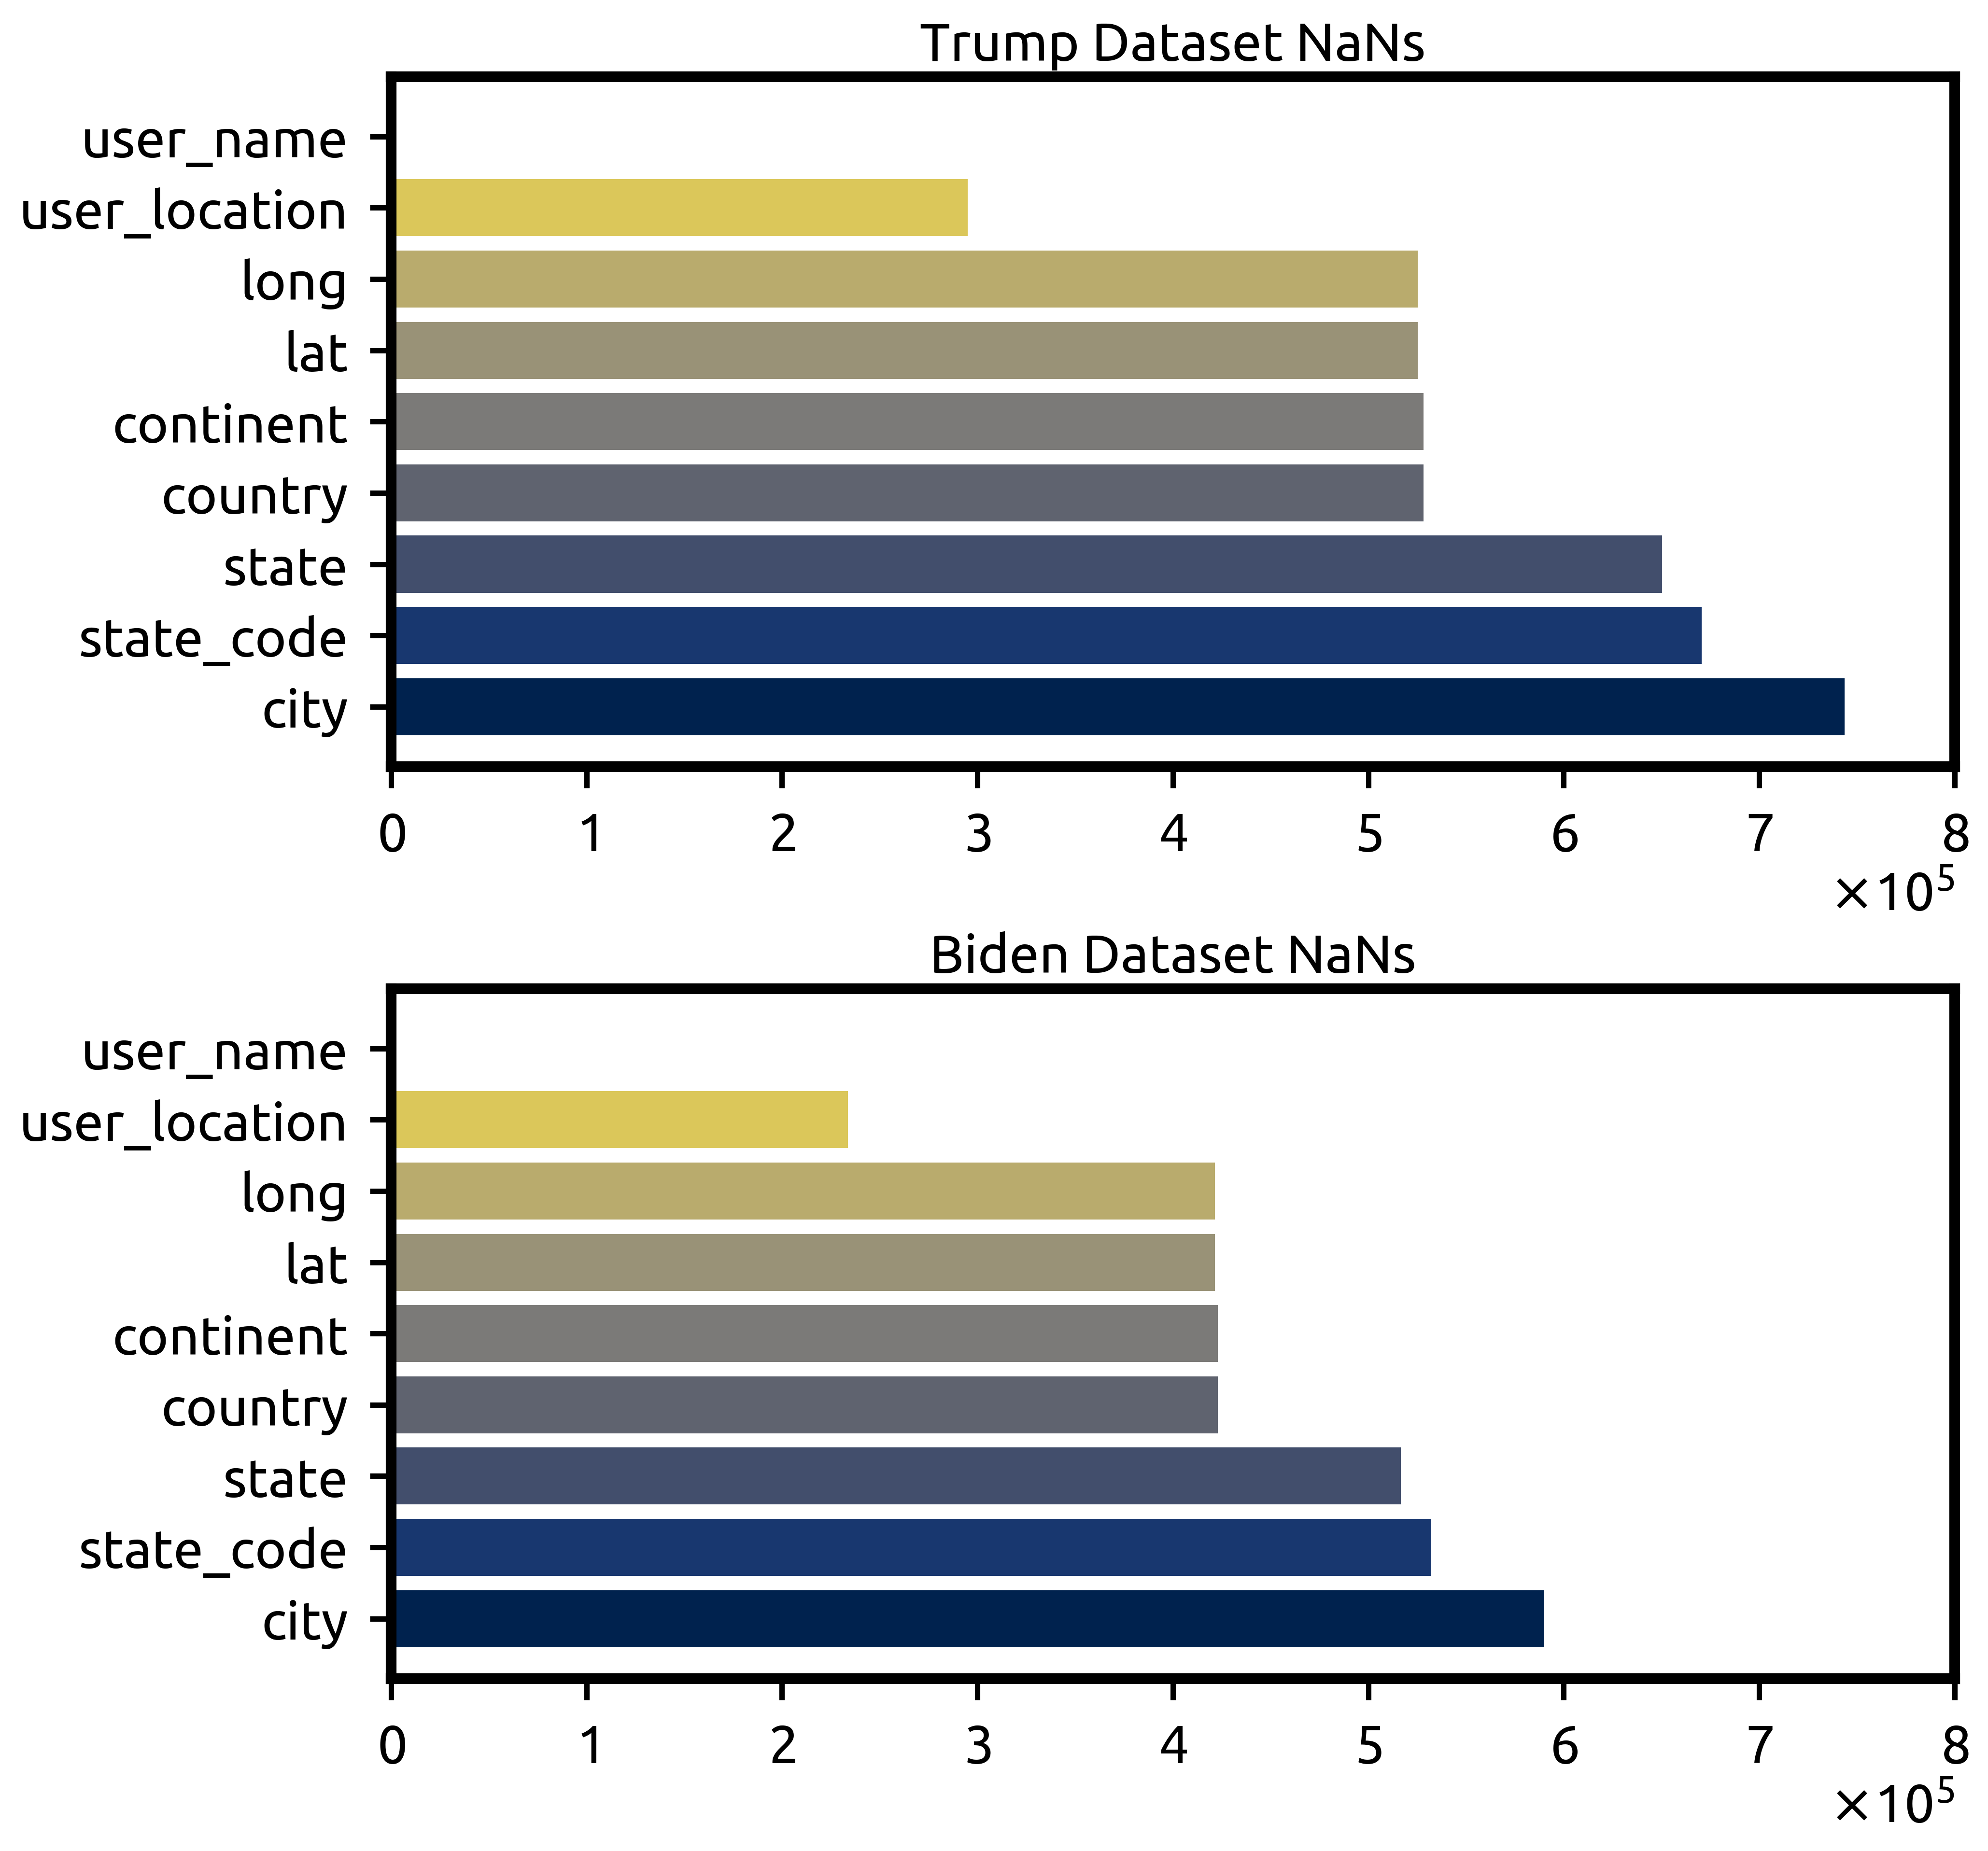

In [5]:
### Starting EDA ######

#### Find number of NaNs in each column for the two datasets #####
biden_nans=pd.Series(biden_set.isna().sum()[biden_set.isna().sum()>0].sort_values(ascending=False))
trump_nans=pd.Series(trump_set.isna().sum()[trump_set.isna().sum()>0].sort_values(ascending=False))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
xlim=800000
#plt.subplots_adjust(hspace = .1)
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('cividis')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(len(trump_nans))

ax1.barh(y_pos,trump_nans,color=my_cmap(my_norm(np.linspace(0.,10,10))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(trump_nans.index)
ax1.set_title("Trump Dataset NaNs",size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)
y_pos=np.arange(len(biden_nans))
ax2.barh(y_pos,biden_nans,color=my_cmap(my_norm(np.linspace(0.,10,10))))
ax2.set_yticks(y_pos,minor=False)
ax2.set_yticklabels(biden_nans.index)
ax2.set_title("Biden Dataset NaNs",size=20)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
#ax1.bar(col_names,biden_nans)
#ax2.bar(col_names,trump_nans)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)

plt.savefig('nans_per_column.jpg',dpi=300,bbox_inches='tight')


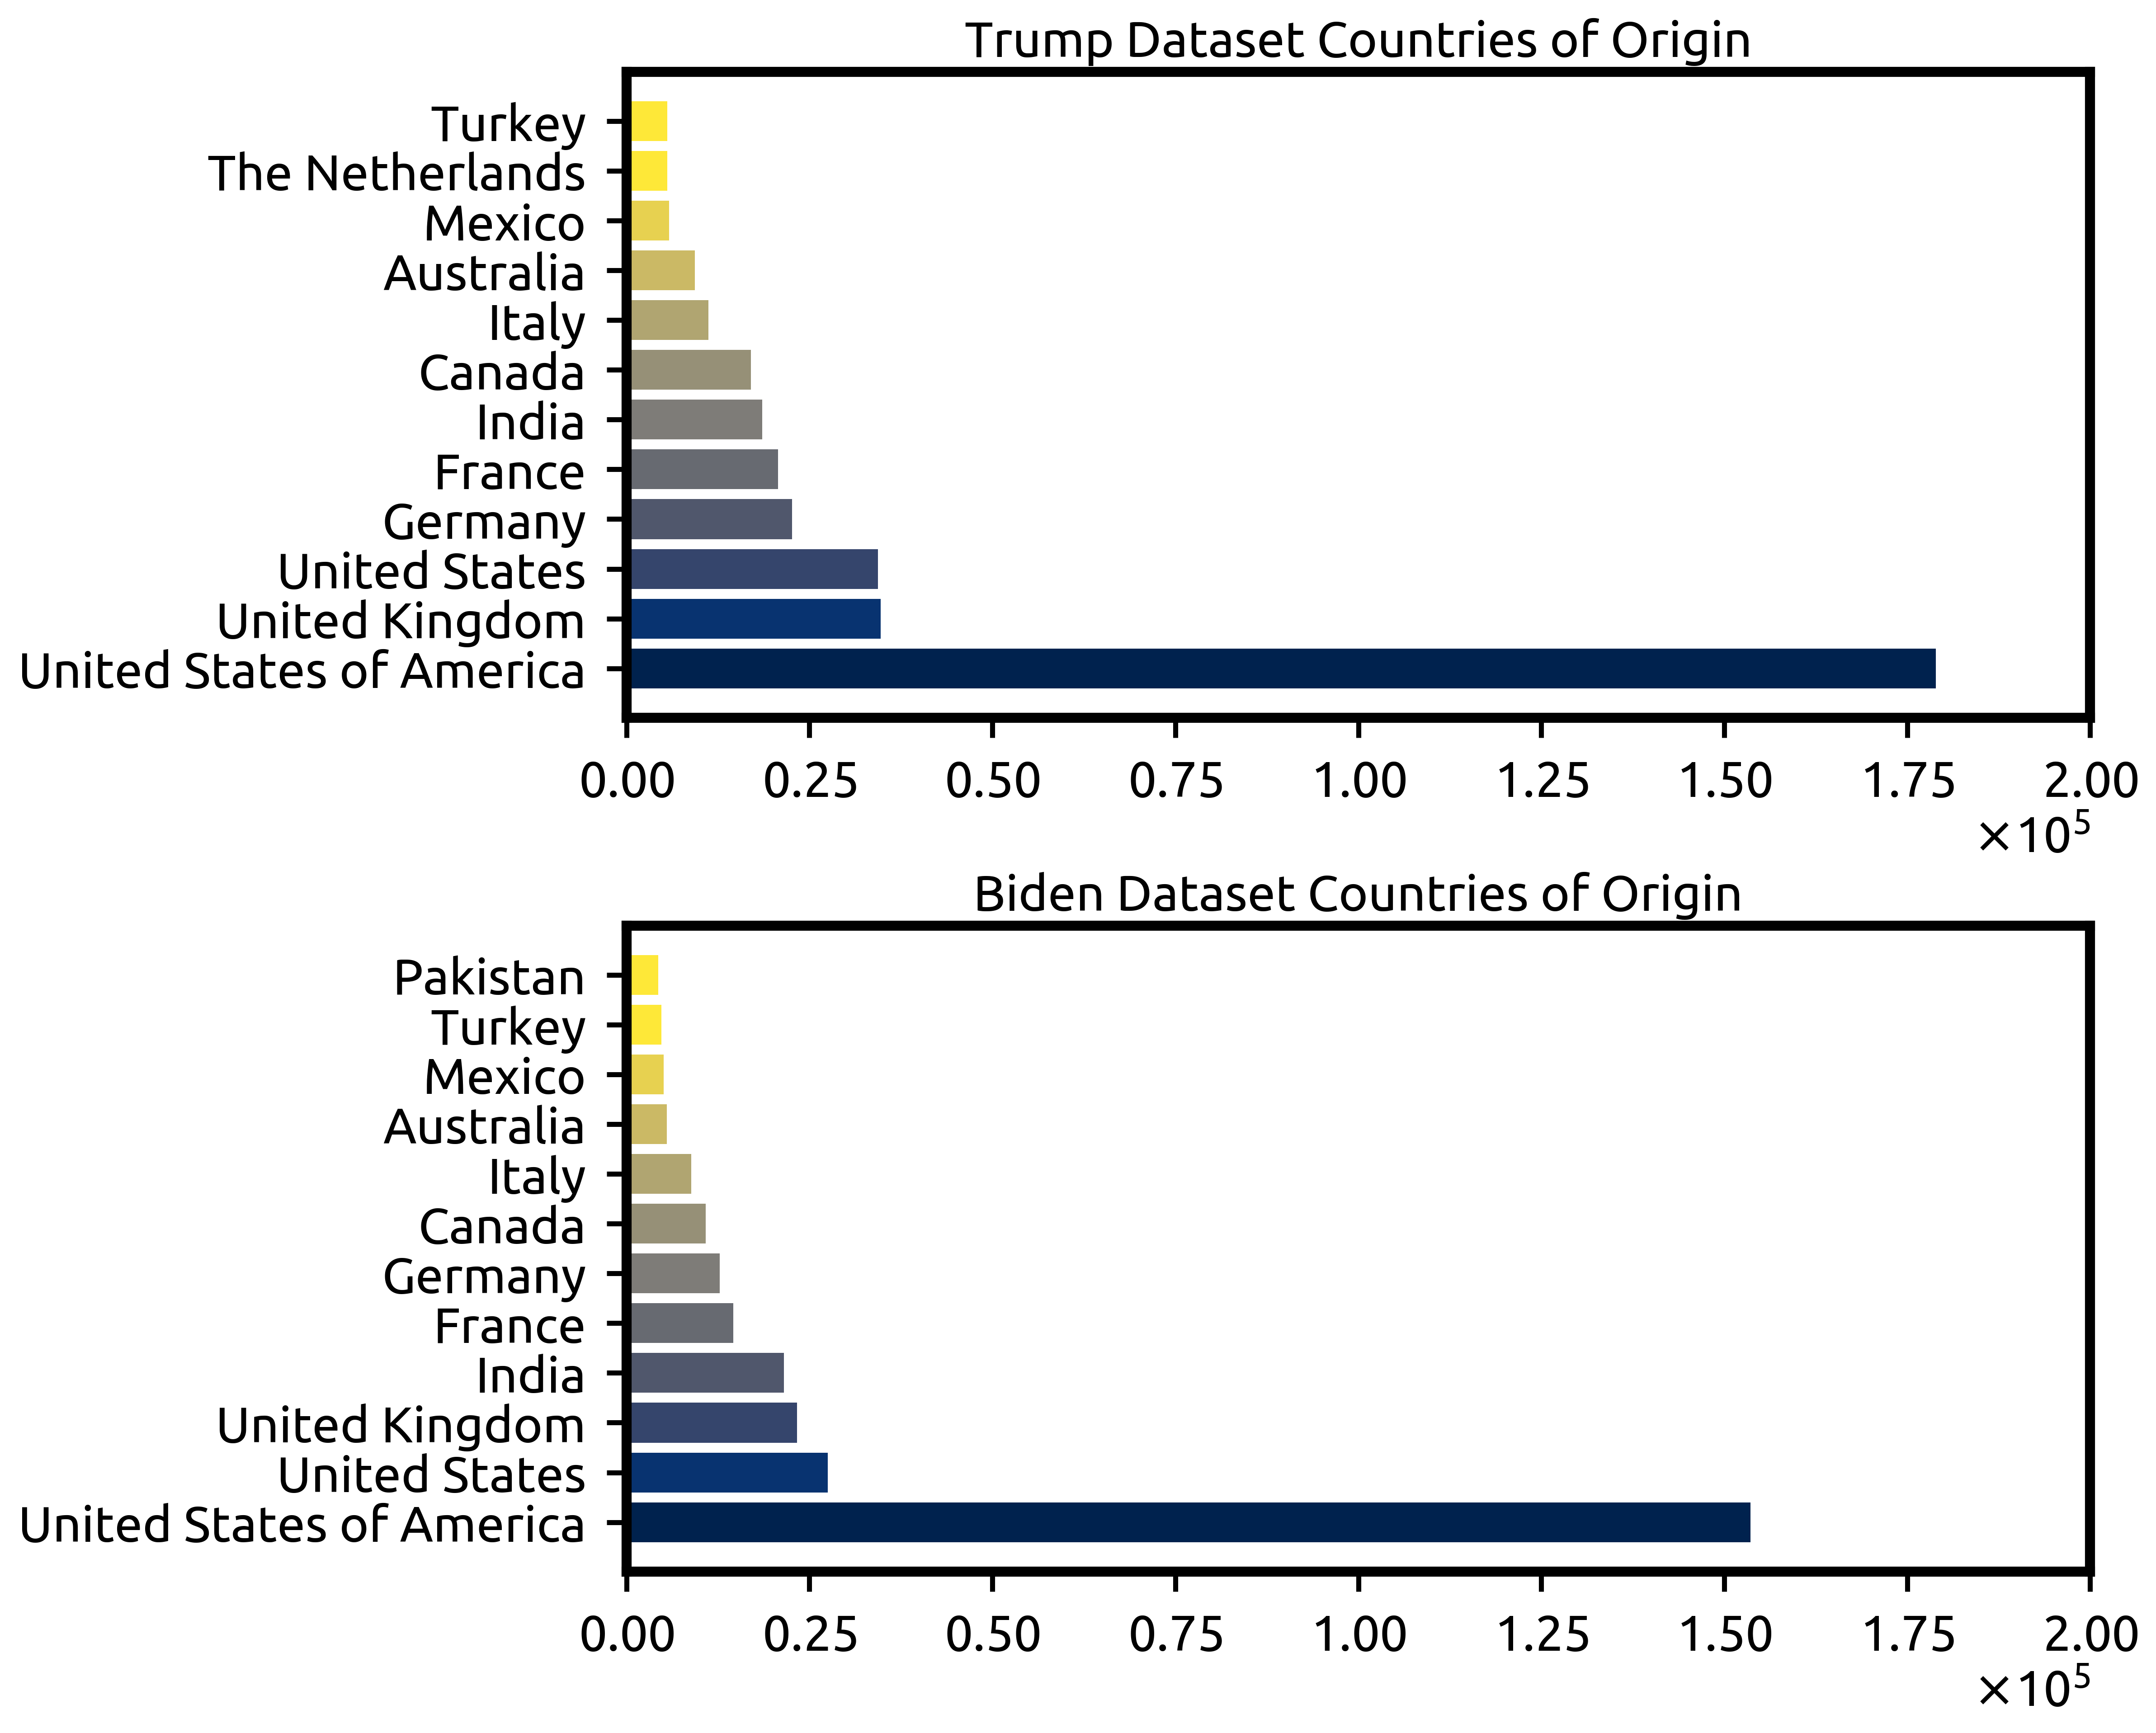

In [6]:
### Checking the first 12 with most tweets ####

trump_origin_country=trump_set.country.value_counts()[:12]
biden_origin_country=biden_set.country.value_counts()[:12]
xlim=2e5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
#plt.subplots_adjust(hspace = .1)
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('cividis')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(len(trump_origin_country))

ax1.barh(y_pos,trump_origin_country,color=my_cmap(my_norm(np.linspace(0,10,12))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(trump_origin_country.index)
ax1.set_title("Trump Dataset Countries of Origin",size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

y_pos=np.arange(len(biden_origin_country))
ax2.barh(y_pos,biden_origin_country,color=my_cmap(my_norm(np.linspace(0,10,12))))
ax2.set_yticks(y_pos,minor=False)
ax2.set_yticklabels(biden_origin_country.index)
ax2.set_title("Biden Dataset Countries of Origin",size=20)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
## Clearly there is an issue, USA is written in two different ways, namely "United States" and "United States of America"
plt.savefig('countries_before.jpg',dpi=300,bbox_inches='tight')


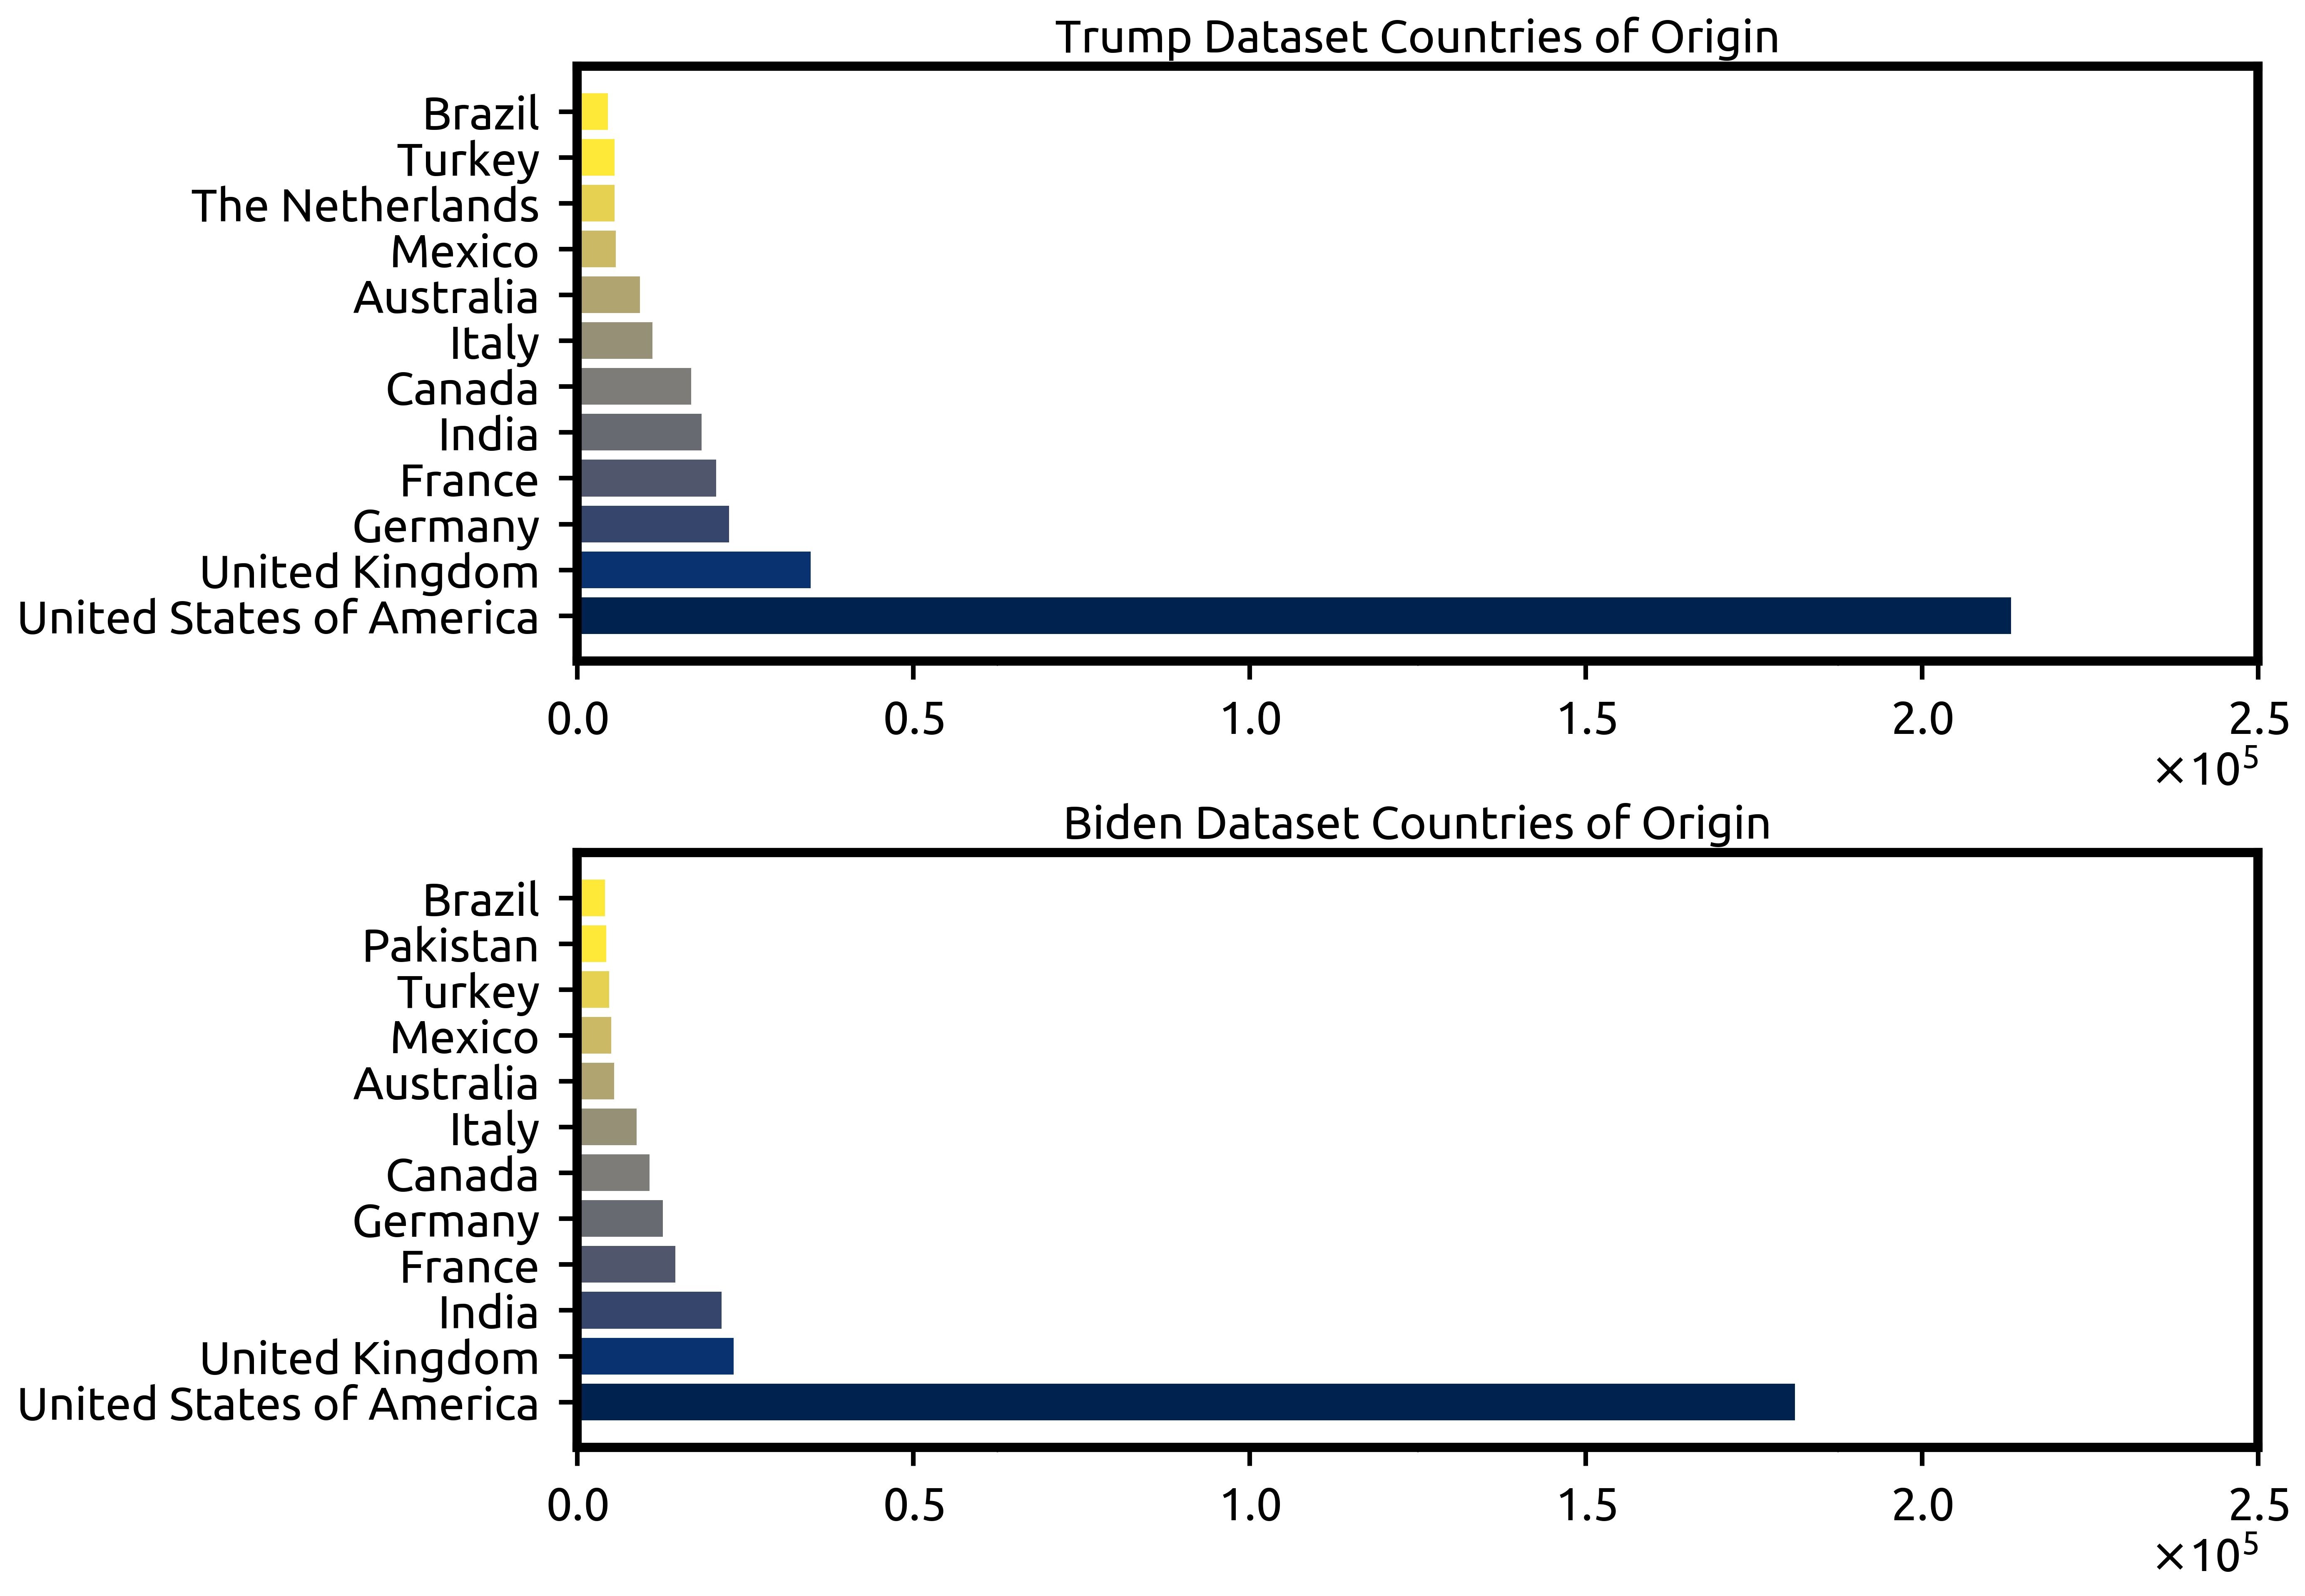

In [7]:
### Unifying United States and United States of America entries under United States of America ####
trump_set=trump_set.replace("United States","United States of America")
biden_set=biden_set.replace("United States","United States of America")
trump_origin_country=trump_set.country.value_counts()[:12]
biden_origin_country=biden_set.country.value_counts()[:12]
xlim=2.5e5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
#plt.subplots_adjust(hspace = .1)
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('cividis')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(len(trump_origin_country))

ax1.barh(y_pos,trump_origin_country,color=my_cmap(my_norm(np.linspace(0,10,12))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(trump_origin_country.index)
ax1.set_title("Trump Dataset Countries of Origin",size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

y_pos=np.arange(len(biden_origin_country))
ax2.barh(y_pos,biden_origin_country,color=my_cmap(my_norm(np.linspace(0,10,12))))
ax2.set_yticks(y_pos,minor=False)
ax2.set_yticklabels(biden_origin_country.index)
ax2.set_title("Biden Dataset Countries of Origin",size=20)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
## The two entries are now unified as also seen by the increased number of tweets originating in United States of America ##
plt.savefig('countries_after.jpg',dpi=300,bbox_inches='tight')


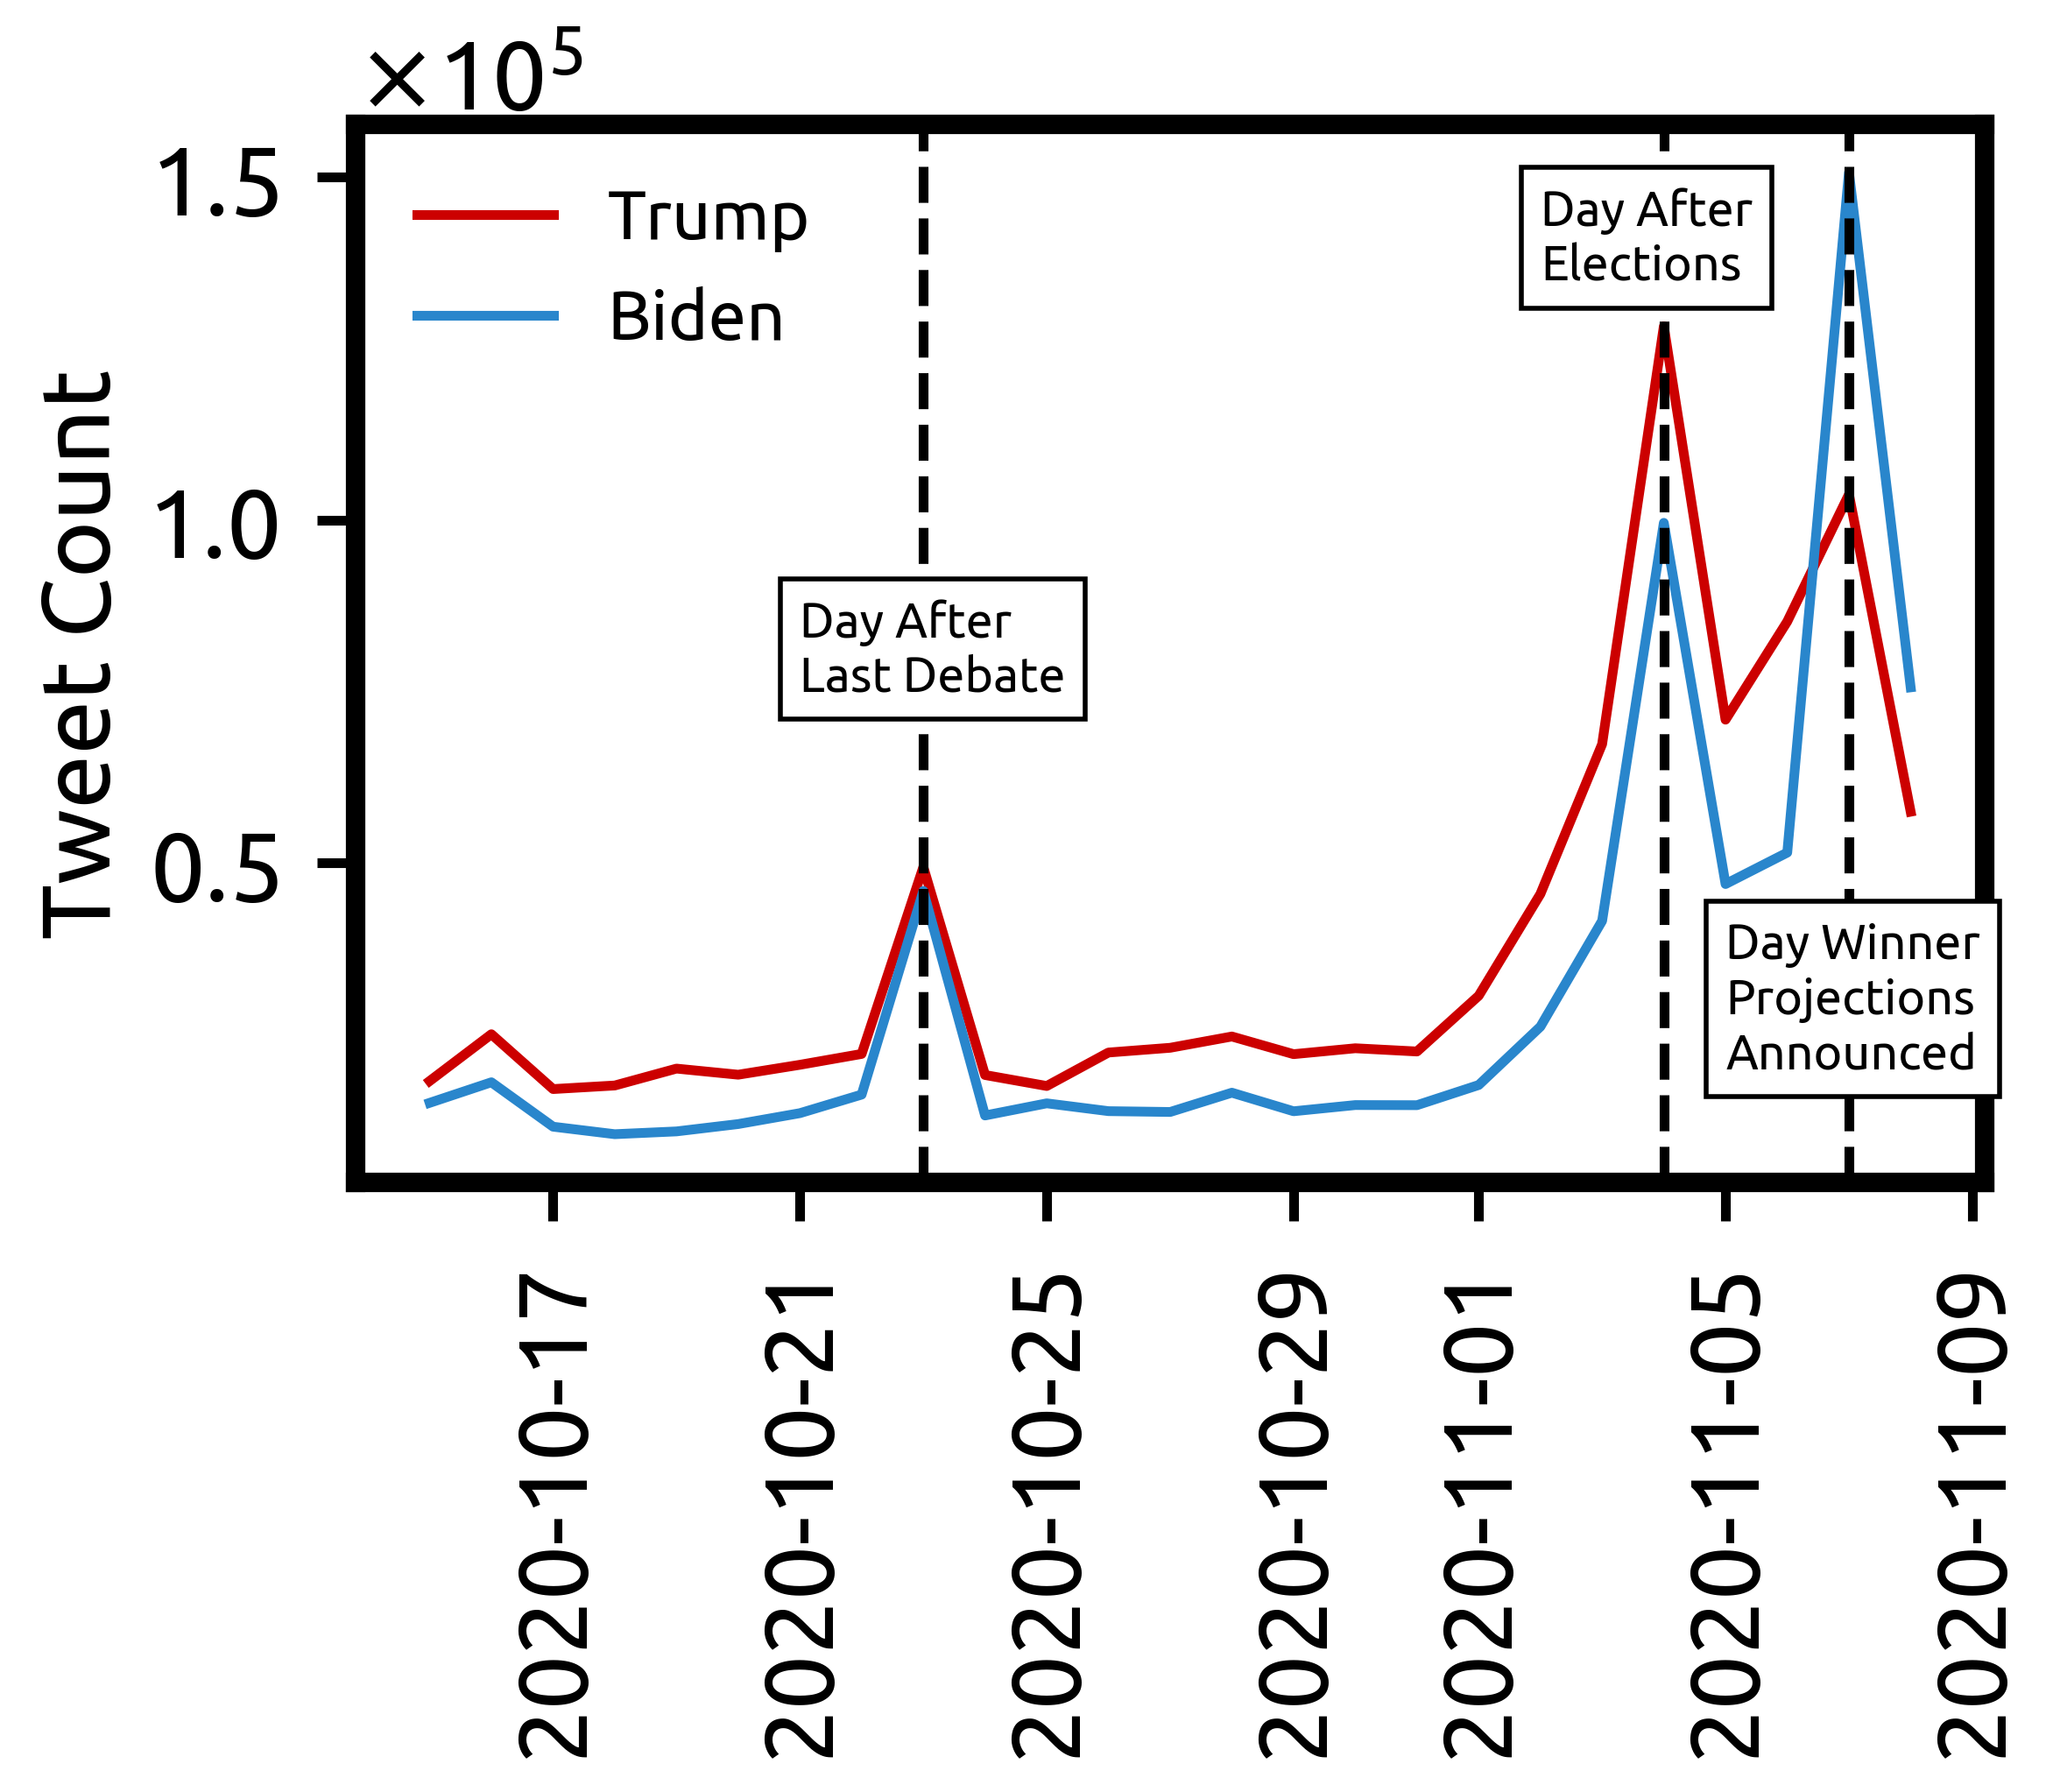

In [8]:
##### How does the number of tweets generated vary over time? ###
trump_tweet_count=pd.to_datetime(trump_set.created_at).dt.date.value_counts().sort_index()
biden_tweet_count=pd.to_datetime(biden_set.created_at).dt.date.value_counts().sort_index()
plt.plot(trump_tweet_count.index,trump_tweet_count,color='#cc0000',label='Trump');
plt.plot(biden_tweet_count.index,biden_tweet_count,'-',color='#2986cc',label='Biden');
plt.ylabel("Tweet Count")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
plt.axvline(datetime(2020,10,23),color='k',linestyle='--')
plt.text(datetime(2020,10,21),0.75e5,'Day After\nLast Debate',bbox=dict(facecolor='white'))
plt.axvline(datetime(2020,11,4),color='k',linestyle='--')
plt.text(datetime(2020,11,2),1.35e5,'Day After\nElections',bbox=dict(facecolor='white'))
plt.axvline(datetime(2020,11,7),color='k',linestyle='--')
plt.text(datetime(2020,11,5),0.2e5,'Day Winner\nProjections\nAnnounced',bbox=dict(facecolor='white'))
plt.legend(frameon=False)
plt.xticks(rotation='vertical');
plt.savefig('tweet_count.jpg',dpi=300,bbox_inches='tight')

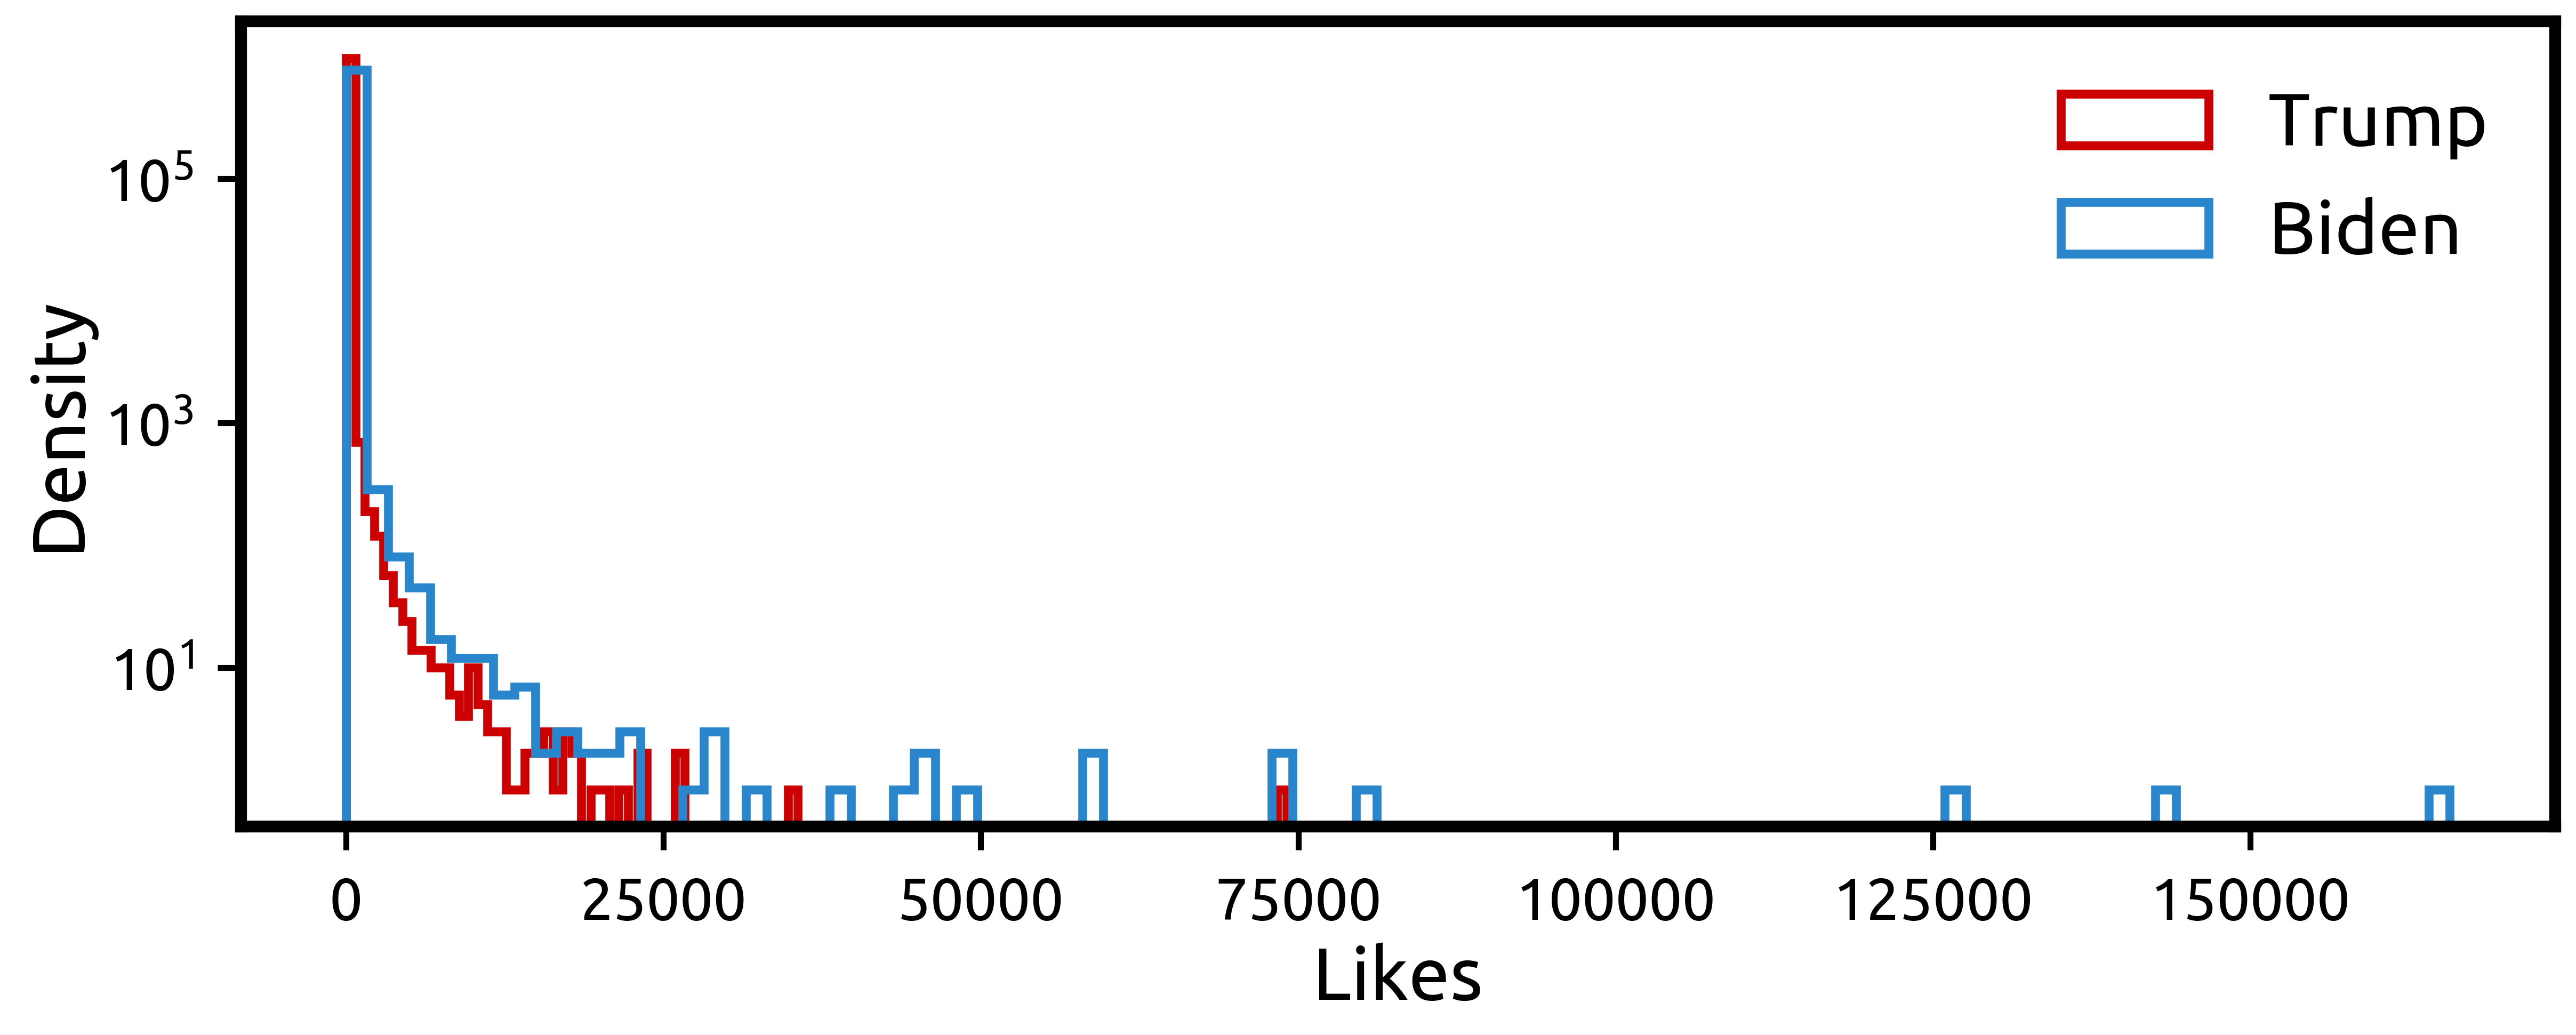

In [9]:
### Histogram with Likes Distribution #####
from scipy.stats import iqr as sci_iqr
plt.figure(figsize=(14,5))
nbins=100
# iqr=sci_iqr(trump_set['likes'].values)#;print(rg_iqr)
# bw=2*iqr/trump_set['likes'].values.size**(1/3)#;print(bw)
# nbins=(trump_set['likes'].values.max()-trump_set['likes'].values.min())/bw#;print("# Bins:",int(nbins))
plt.hist(trump_set['likes'].values,bins=int(nbins),density=False,color='#cc0000',label="Trump", histtype='step',lw=3)
# iqr=sci_iqr(biden_set['likes'].values)#;print(rg_iqr)
# bw=2*iqr/biden_set['likes'].values.size**(1/3)#;print(bw)
# nbins=(biden_set['likes'].values.max()-biden_set['likes'].values.min())/bw
plt.hist(biden_set['likes'].values,bins=int(nbins),density=False,color='#2986cc',label="Biden", histtype='step',lw=3)
plt.legend(frameon=False, fontsize=25)
plt.yscale('log')
plt.ylabel("Density",fontsize=25)
plt.xlabel("Likes",fontsize=25)
plt.savefig('likes_histogram.jpg',dpi=300,bbox_inches='tight')

(-1000.0, 30000.0)

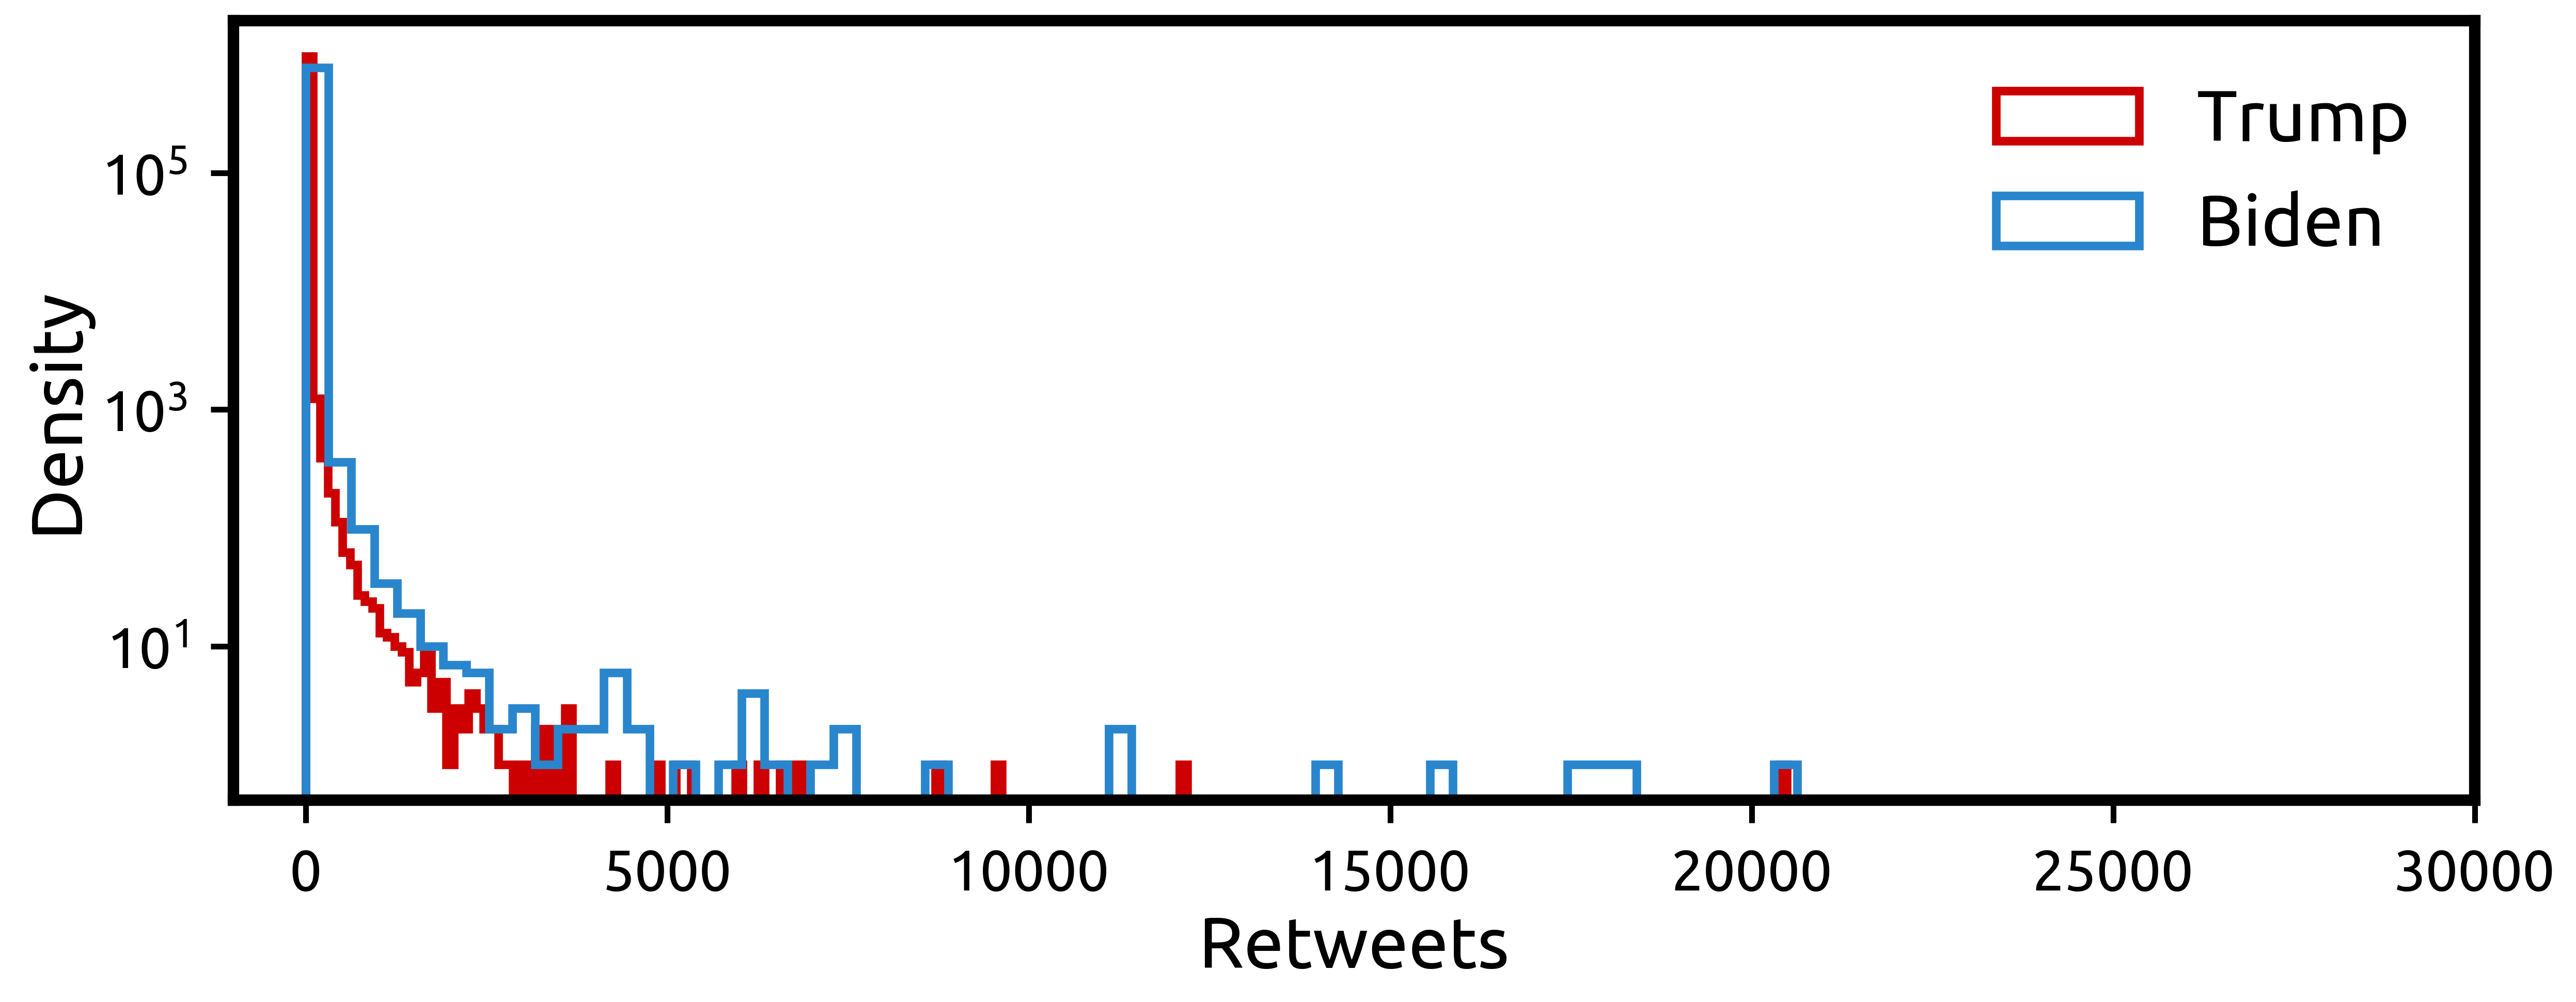

In [10]:
### Distribution of Retweets #####

from scipy.stats import iqr as sci_iqr
plt.figure(figsize=(14,5))
nbins=200
# iqr=sci_iqr(trump_set['likes'].values)#;print(rg_iqr)
# bw=2*iqr/trump_set['likes'].values.size**(1/3)#;print(bw)
# nbins=(trump_set['likes'].values.max()-trump_set['likes'].values.min())/bw#;print("# Bins:",int(nbins))
plt.hist(trump_set['retweet_count'].values,bins=int(nbins),density=False,color='#cc0000',label="Trump", histtype='step',lw=3)
# iqr=sci_iqr(biden_set['likes'].values)#;print(rg_iqr)
# bw=2*iqr/biden_set['likes'].values.size**(1/3)#;print(bw)
# nbins=(biden_set['likes'].values.max()-biden_set['likes'].values.min())/bw
plt.hist(biden_set['retweet_count'].values,bins=int(nbins),density=False,color='#2986cc',label="Biden", histtype='step',lw=3)
plt.legend(frameon=False, fontsize=25)
plt.yscale('log')
plt.ylabel("Density",fontsize=25)
plt.xlabel("Retweets",fontsize=25)
plt.savefig('retweet_histogram.jpg',dpi=300,bbox_inches='tight')
plt.xlim(-1000,30000)


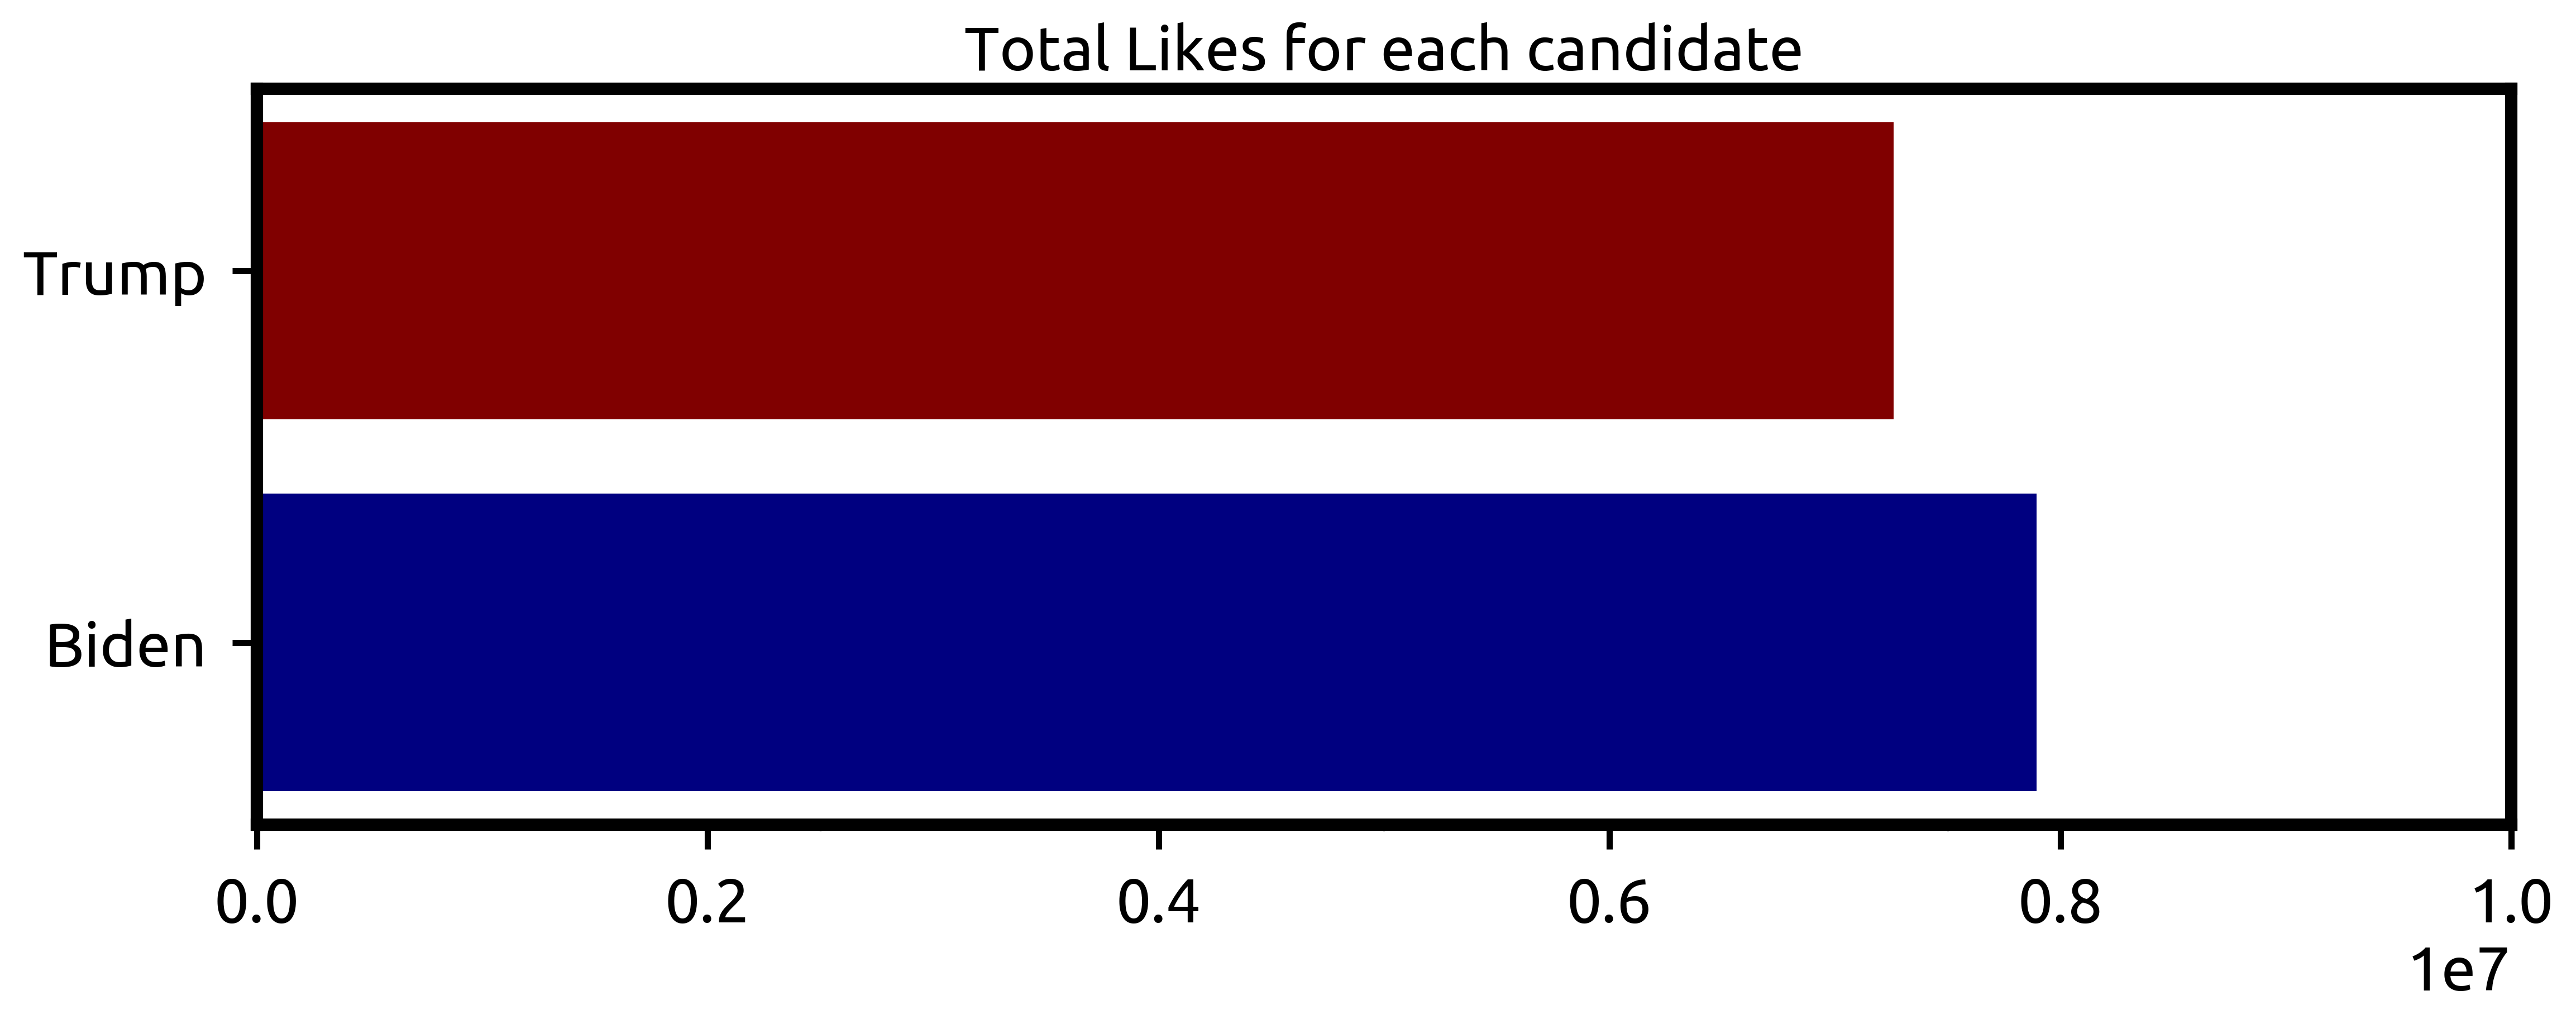

In [11]:
#### Total Likes ####

total_likes=[biden_set['likes'].values.sum(),trump_set['likes'].values.sum()]
labels=["Biden","Trump"]

xlim=1e7
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('jet')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(2)

ax1.barh(y_pos,total_likes,color=my_cmap(my_norm(np.linspace(0,10,2))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(labels)
ax1.set_title("Total Likes for each candidate",size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

plt.savefig('likes_total.jpg',dpi=300,bbox_inches='tight')

## The two entries are now unified as also seen by the increased number of tweets originating in United States of America ##

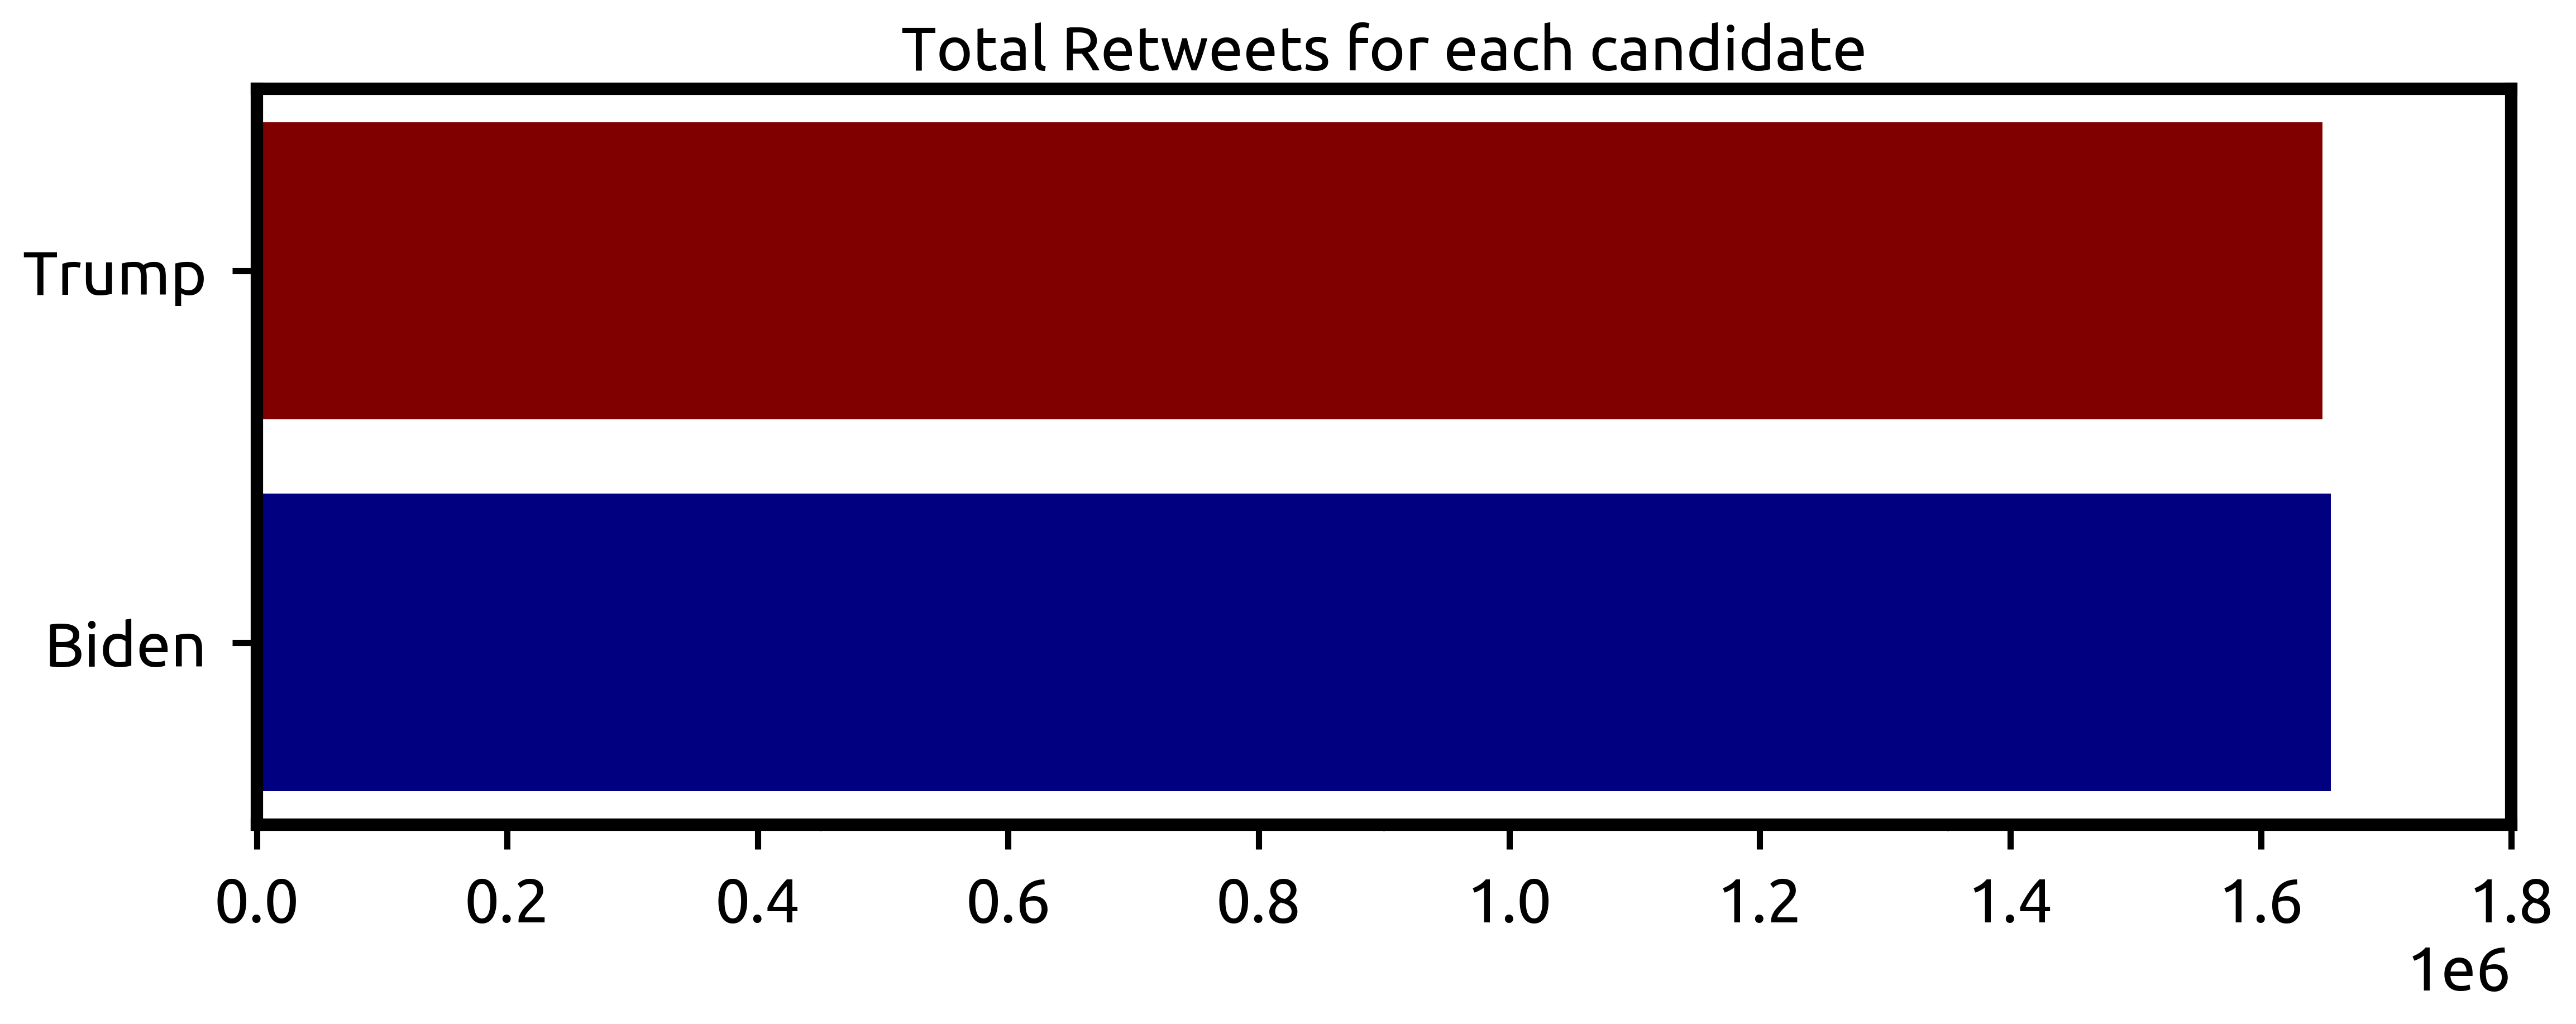

In [12]:
#### Total RT ####

total_likes=[biden_set['retweet_count'].values.sum(),trump_set['retweet_count'].values.sum()]
labels=["Biden","Trump"]

xlim=1.8e6
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('jet')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(2)

ax1.barh(y_pos,total_likes,color=my_cmap(my_norm(np.linspace(0,10,2))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(labels)
ax1.set_title("Total Retweets for each candidate",size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

plt.savefig('histogram_total.jpg',dpi=300,bbox_inches='tight')

## The two entries are now unified as also seen by the increased number of tweets originating in United States of America ##

c:\users\toumba\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\toumba\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\toumba\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\toumba\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\toumba\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127474 missing from current font.
  font.

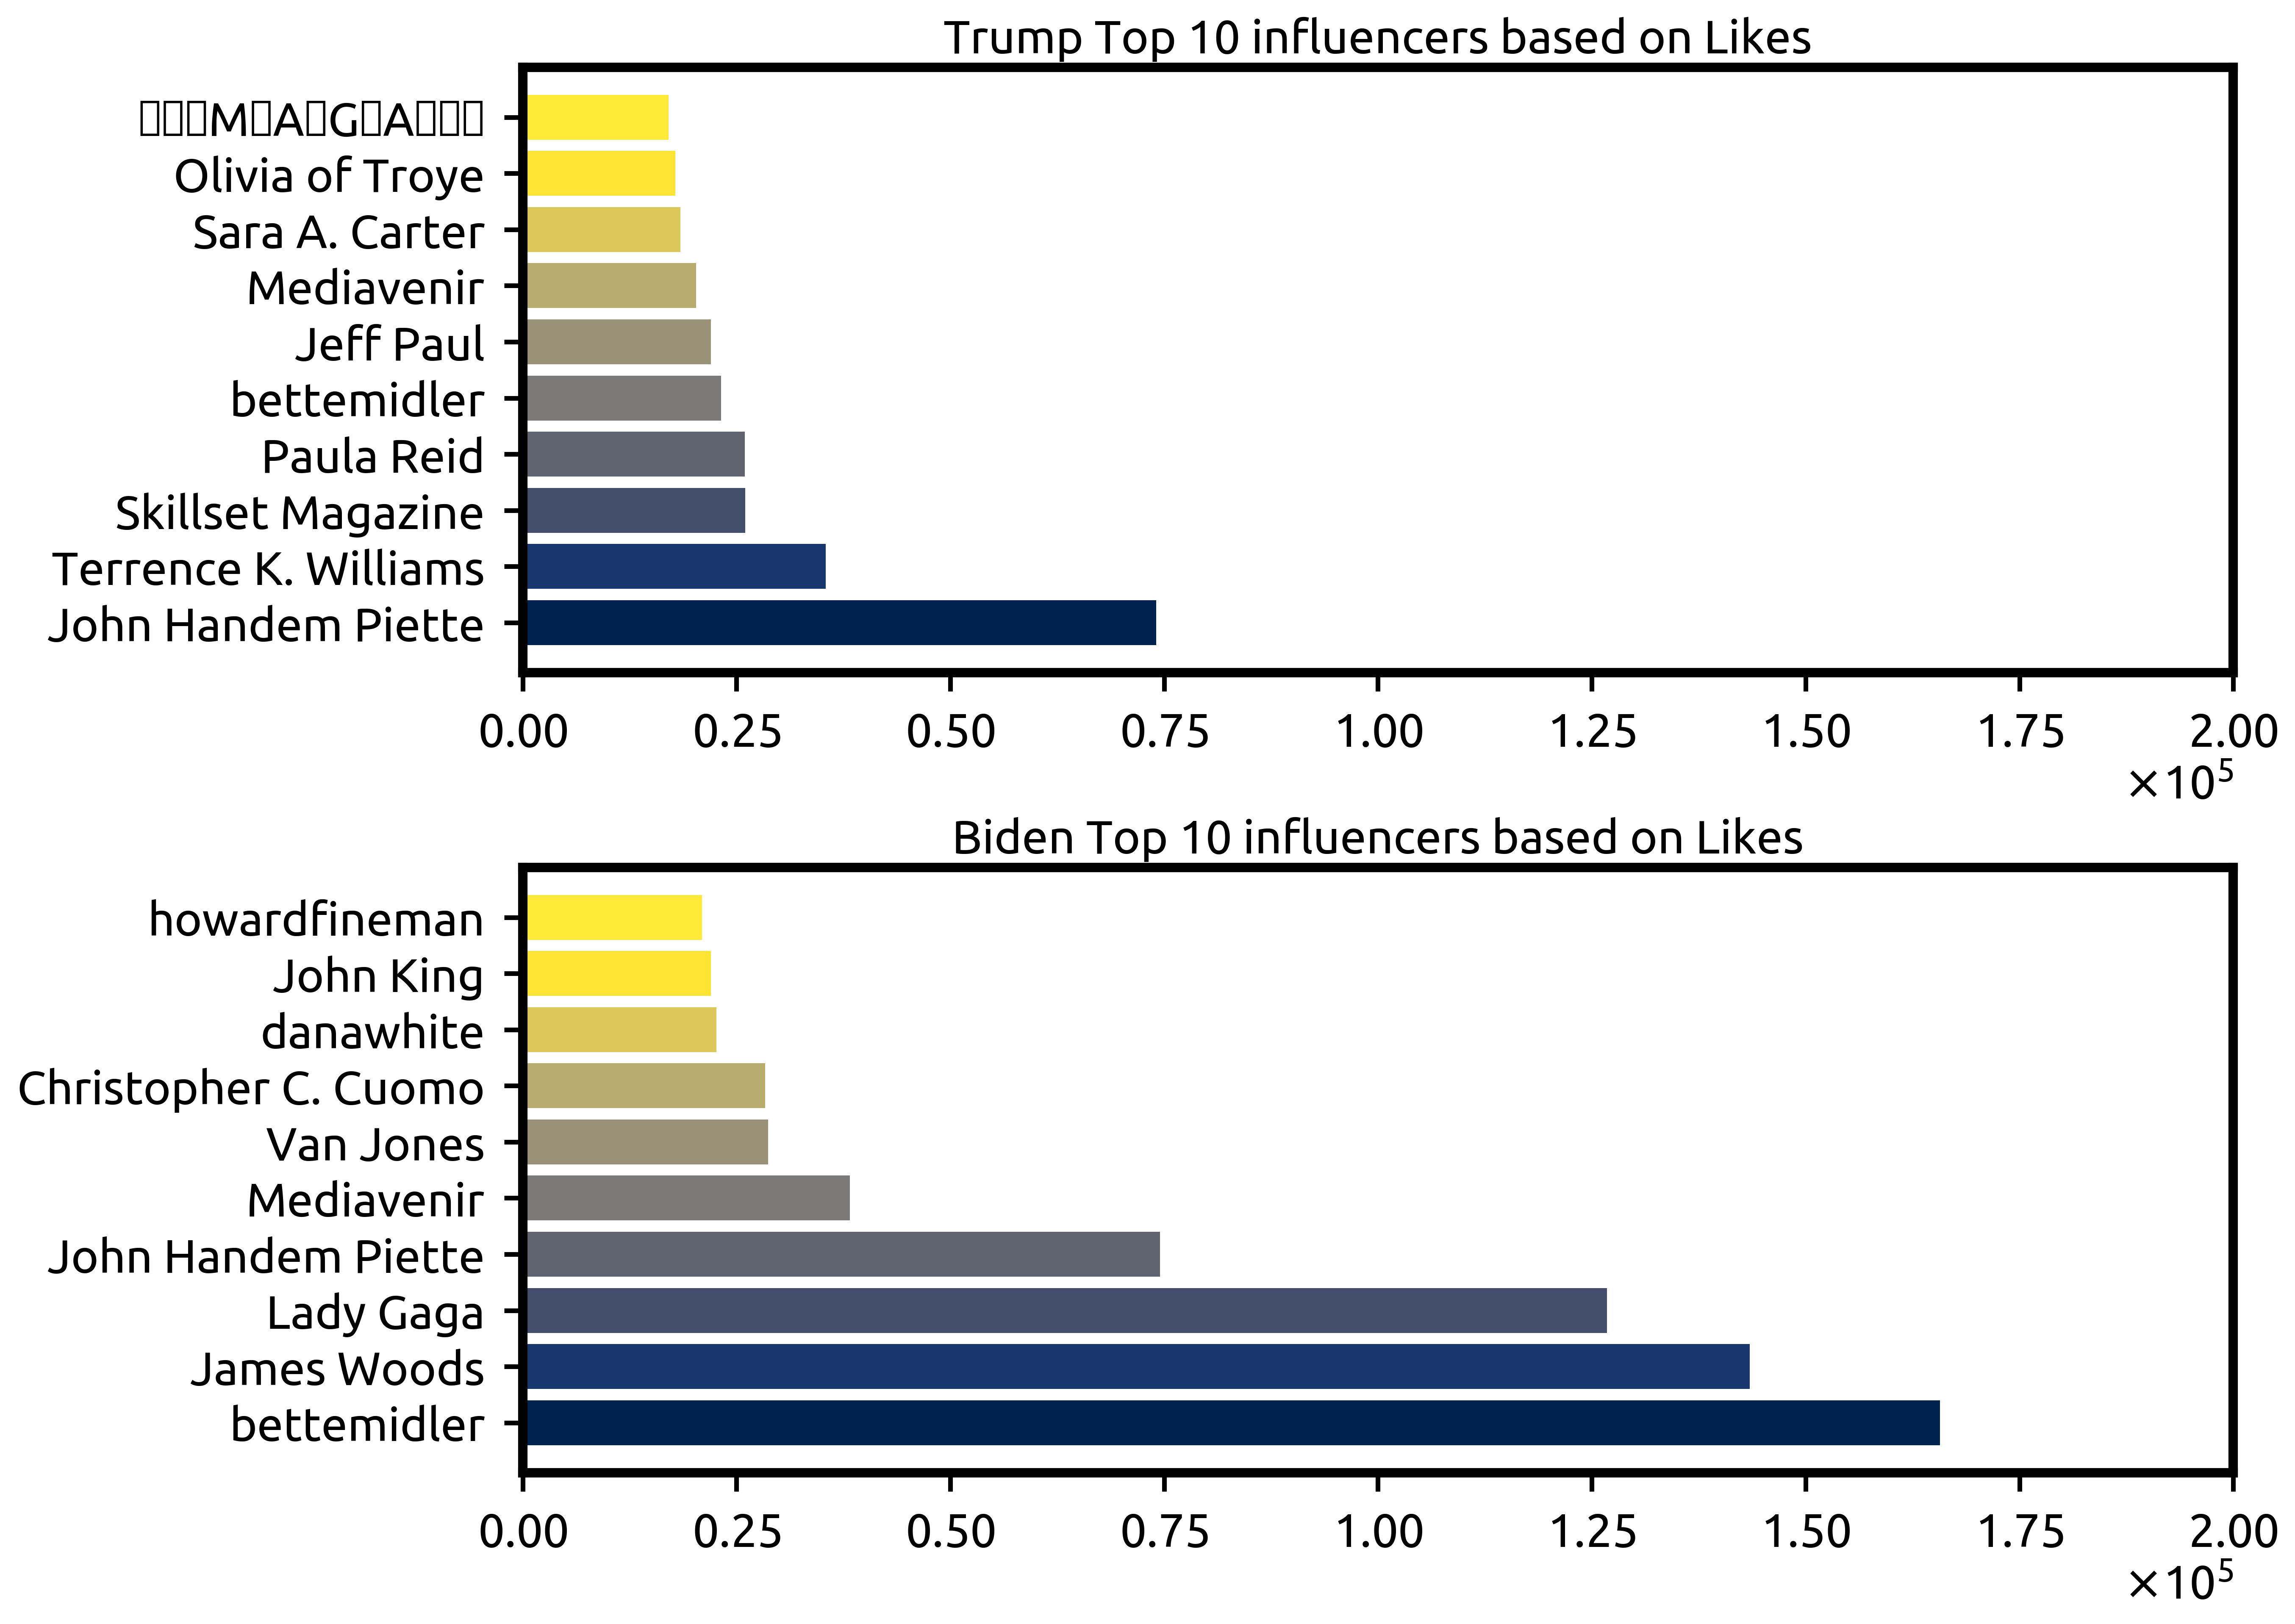

In [13]:
#### Sort influencers according to likes ###
how_many=10
trump_likes_sorted=trump_set.set_index('user_name').sort_values('likes', ascending=False).drop_duplicates('user_id')
trump_likes_sorted=trump_likes_sorted[:how_many]
biden_likes_sorted=biden_set.set_index('user_name').sort_values('likes', ascending=False).drop_duplicates('user_id')
biden_likes_sorted=biden_likes_sorted[:how_many]

xlim=2e5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
#plt.subplots_adjust(hspace = .1)
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('cividis')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(len(trump_likes_sorted['likes'].index))

ax1.barh(y_pos,trump_likes_sorted['likes'].values,color=my_cmap(my_norm(np.linspace(0,10,how_many))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(trump_likes_sorted['likes'].index)
ax1.set_title("Trump Top %d influencers based on Likes"%(how_many),size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

y_pos=np.arange(len(biden_likes_sorted['likes']))
ax2.barh(y_pos,biden_likes_sorted['likes'].values,color=my_cmap(my_norm(np.linspace(0,10,how_many))))
ax2.set_yticks(y_pos,minor=False)
ax2.set_yticklabels(biden_likes_sorted['likes'].index)
ax2.set_title("Biden Top %d influencers based on Likes"%(how_many),size=20)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
## The two entries are now unified as also seen by the increased number of tweets originating in United States of America ##
plt.savefig('top_infl_likes.jpg',dpi=300,bbox_inches='tight')


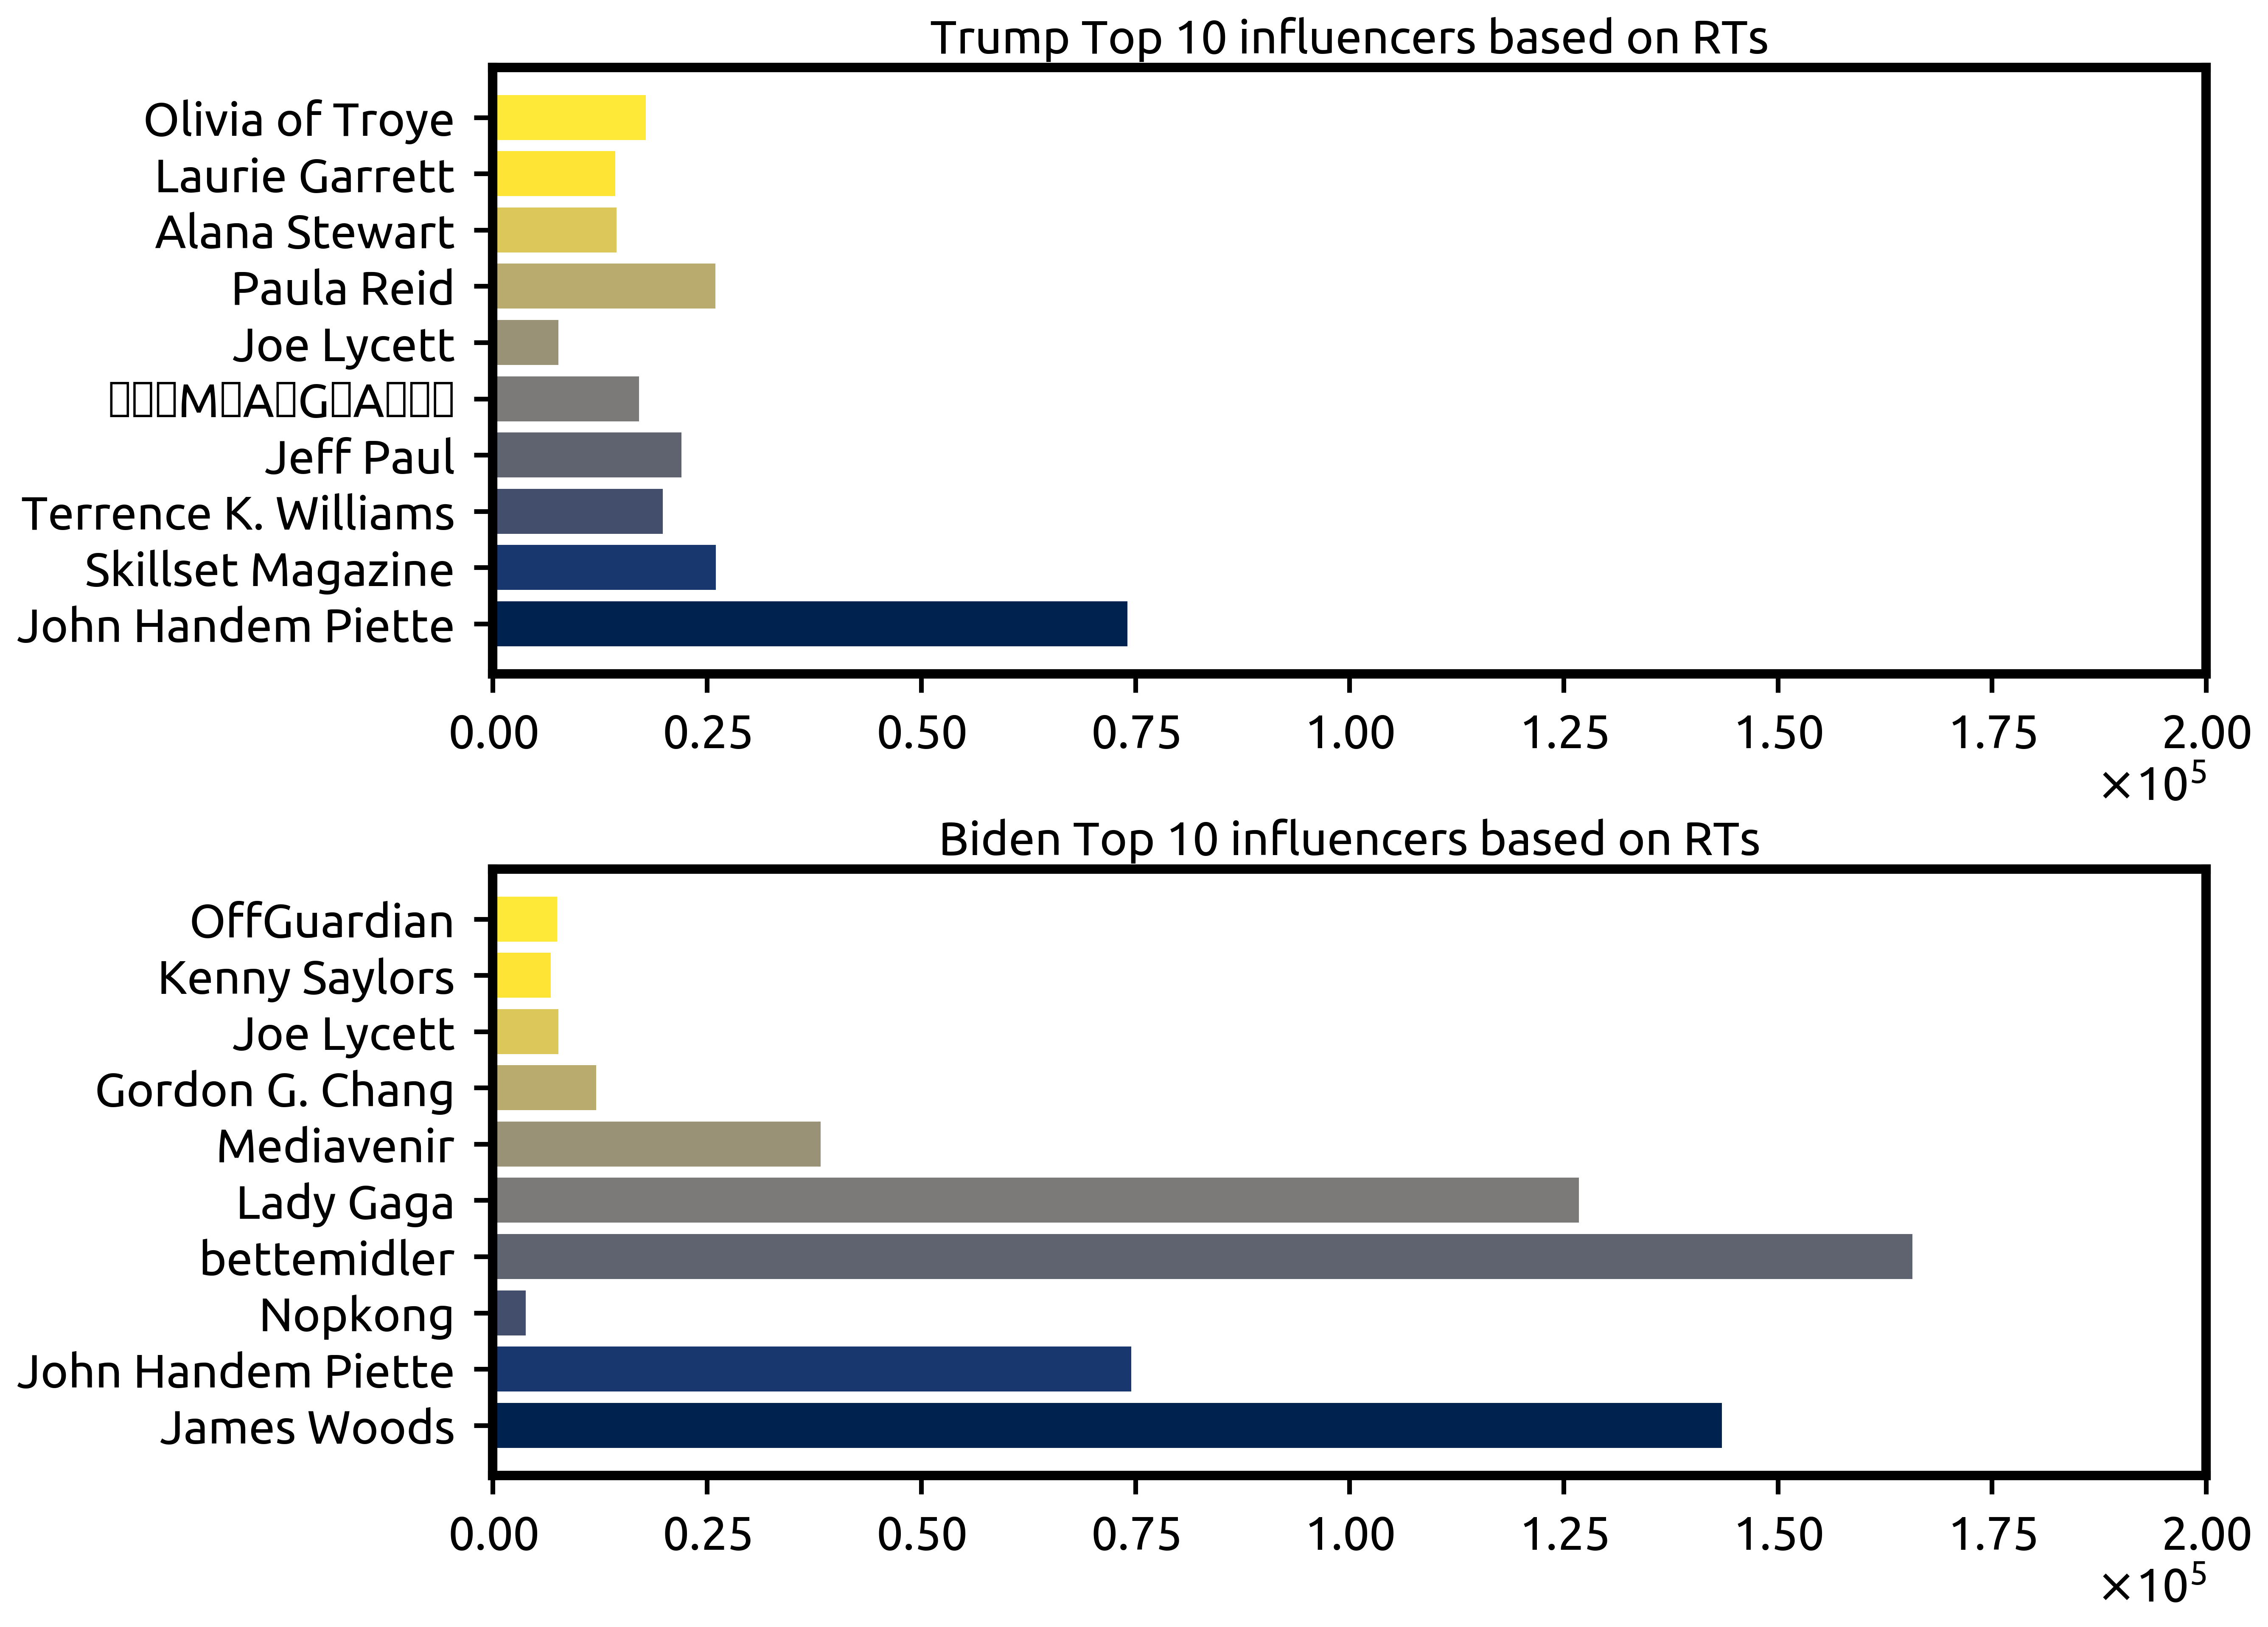

In [14]:
#### Sort influencers according to retweets ###
how_many=10
trump_likes_sorted=trump_set.set_index('user_name').sort_values('retweet_count', ascending=False).drop_duplicates('user_id')
trump_likes_sorted=trump_likes_sorted.sort_values('retweet_count', ascending=False)[:how_many]
biden_likes_sorted=biden_set.set_index('user_name').sort_values('retweet_count', ascending=False).drop_duplicates('user_id')
biden_likes_sorted=biden_likes_sorted.sort_values('retweet_count', ascending=False)[:how_many]

xlim=2e5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
#plt.subplots_adjust(hspace = .1)
fig.tight_layout(pad=4.0)
my_cmap = mpl.cm.get_cmap('cividis')
my_norm = mpl.colors.Normalize(vmin=0, vmax=len(trump_nans))
y_pos=np.arange(len(trump_likes_sorted['likes'].index))

ax1.barh(y_pos,trump_likes_sorted['likes'].values,color=my_cmap(my_norm(np.linspace(0,10,how_many))))
ax1.set_yticks(y_pos,minor=False)
ax1.set_yticklabels(trump_likes_sorted['likes'].index)
ax1.set_title("Trump Top %d influencers based on RTs"%(how_many),size=20)
ax1.set_xlim(0,xlim)
ax1.set_xticks(np.linspace(0,xlim,5),minor=True)

y_pos=np.arange(len(biden_likes_sorted['likes']))
ax2.barh(y_pos,biden_likes_sorted['likes'].values,color=my_cmap(my_norm(np.linspace(0,10,how_many))))
ax2.set_yticks(y_pos,minor=False)
ax2.set_yticklabels(biden_likes_sorted['likes'].index)
ax2.set_title("Biden Top %d influencers based on RTs"%(how_many),size=20)
ax2.set_xlim(0,xlim)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax2.set_xticks(np.linspace(0,xlim,5),minor=True)
ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
ax2.ticklabel_format(axis="x", style="sci", scilimits=(0,0),useMathText=True)
## The two entries are now unified as also seen by the increased number of tweets originating in United States of America ##
plt.savefig('top_infl_rts.jpg',dpi=300,bbox_inches='tight')
